# Predictive Maintenance

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mlp
import seaborn as sn
import os
import time
from sklearn.preprocessing import MinMaxScaler #to normalize data
from sklearn.pipeline import Pipeline

In [5]:
os.chdir('C:\\Users\\Lenovo\\Desktop\\CMaps')

In [6]:
def prepare_data(drop_cols = True):
    dependent_var = ['RUL']
    index_columns_names =  ["UnitNumber","Cycle"]
    operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]
    sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
    input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

    cols_to_drop = ['OpSet3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure10', 'SensorMeasure14',
     'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19']

    df_train = pd.read_csv('train_FD001.txt',delim_whitespace=True,names=input_file_column_names)

    rul = pd.DataFrame(df_train.groupby('UnitNumber')['Cycle'].max()).reset_index()
    rul.columns = ['UnitNumber', 'max']
    df_train = df_train.merge(rul, on=['UnitNumber'], how='left')
    df_train['RUL'] = df_train['max'] - df_train['Cycle']
    df_train.drop('max', axis=1, inplace=True)

    df_test = pd.read_csv('test_FD001.txt', delim_whitespace=True, names=input_file_column_names)
    
    if(drop_cols == True):
        df_train = df_train.drop(cols_to_drop, axis = 1)
        df_test = df_test.drop(cols_to_drop, axis = 1)

    y_true = pd.read_csv('RUL_FD001.txt', delim_whitespace=True,names=["RUL"])
    y_true["UnitNumber"] = y_true.index + 1
    
    return df_train, df_test, y_true


In [7]:
df_train, df_test, y_true = prepare_data(drop_cols=True)
df_train.shape, df_test.shape, y_true.shape


((20631, 18), (13096, 17), (100, 2))

<AxesSubplot:>

<Figure size 30000x30000 with 0 Axes>

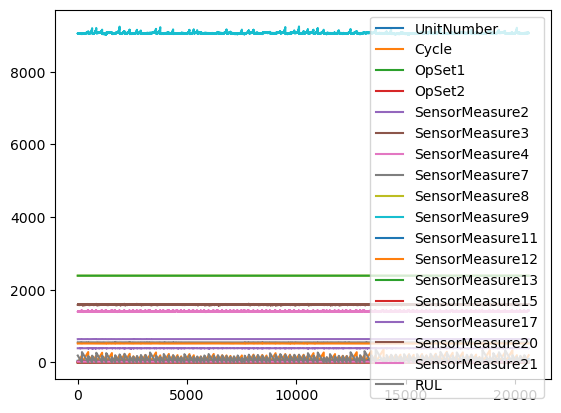

In [8]:
mlp.figure(figsize=(300,300))
df_train.plot()

In [9]:
feats = df_train.columns.drop(['UnitNumber', 'Cycle', 'RUL'])

In [10]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

df_train[feats] = min_max_scaler.fit_transform(df_train[feats])
df_test[feats] = min_max_scaler.transform(df_test[feats])

In [11]:
df_train['failure'] = [1 if i < 50 else 0 for i in df_train.RUL]
y_true['failure'] = [1 if i < 50 else 0 for i in y_true.RUL]

In [12]:
df_train.head()

UnitNumber  Cycle    OpSet1    OpSet2  SensorMeasure2  SensorMeasure3  \
0           1      1 -0.080460 -0.666667       -0.632530       -0.186396   
1           1      2  0.218391 -0.500000       -0.433735       -0.093961   
2           1      3 -0.494253  0.500000       -0.313253       -0.260955   
3           1      4  0.080460  0.000000       -0.313253       -0.487683   
4           1      5 -0.218391 -0.333333       -0.301205       -0.485066   

   SensorMeasure4  SensorMeasure7  SensorMeasure8  SensorMeasure9  \
0       -0.380486        0.452496       -0.515152       -0.780490   
1       -0.294733        0.256039       -0.575758       -0.799515   
2       -0.258947        0.420290       -0.454545       -0.719914   
3       -0.337610        0.481481       -0.363636       -0.750965   
4       -0.190749        0.336554       -0.515152       -0.700081   

   SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure15  \
0        -0.261905         0.266525        -0.588235        -0.272028   
1        -0.238095         0.530917        -0.441176        -0.177376   
2        -0.500000         0.590618        -0.558824        -0.285110   
3        -0.666667         0.778252        -0.411765        -0.666795   
4        -0.488095         0.492537        -0.529412        -0.195845   

   SensorMeasure17  SensorMeasure20  SensorMeasure21  RUL  failure  
0        -0.333333         0.426357         0.449323  191        0  
1        -0.333333         0.333333         0.462027  190        0  
2        -0.666667         0.255814         0.242751  189        0  
3        -0.333333         0.147287         0.324772  188        0  
4        -0.166667         0.178295         0.409003  187        0

In [13]:
df_test.head()

UnitNumber  Cycle    OpSet1    OpSet2  SensorMeasure2  SensorMeasure3  \
0           1      1  0.264368  0.500000        0.090361       -0.378679   
1           1      2 -0.310345 -0.500000       -0.698795       -0.240898   
2           1      3  0.034483  0.166667       -0.246988       -0.306736   
3           1      4  0.482759  0.000000       -0.259036       -0.429693   
4           1      5  0.160920  0.000000       -0.216867       -0.295836   

   SensorMeasure4  SensorMeasure7  SensorMeasure8  SensorMeasure9  \
0       -0.461175        0.304348       -0.575758       -0.744773   
1       -0.555368        0.610306       -0.666667       -0.706632   
2       -0.355503        0.371981       -0.545455       -0.683837   
3       -0.183997        0.359098       -0.606061       -0.788567   
4       -0.335922        0.388084       -0.666667       -0.795208   

   SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure15  \
0        -0.583333         0.292111        -0.558824        -0.382070   
1        -0.226190         0.479744        -0.470588        -0.573682   
2        -0.226190         0.398721        -0.558824        -0.082724   
3        -0.488095         0.147122        -0.500000        -0.485956   
4        -0.452381         0.475480        -0.558824        -0.398230   

   SensorMeasure17  SensorMeasure20  SensorMeasure21  
0        -0.333333         0.116279         0.323667  
1        -0.166667         0.364341         0.373654  
2        -0.166667         0.457364         0.442695  
3        -0.500000         0.333333         0.324220  
4        -0.666667         0.317829         0.432753

In [14]:
y_true.head()


RUL  UnitNumber  failure
0  112           1        0
1   98           2        0
2   69           3        0
3   82           4        0
4   91           5        0

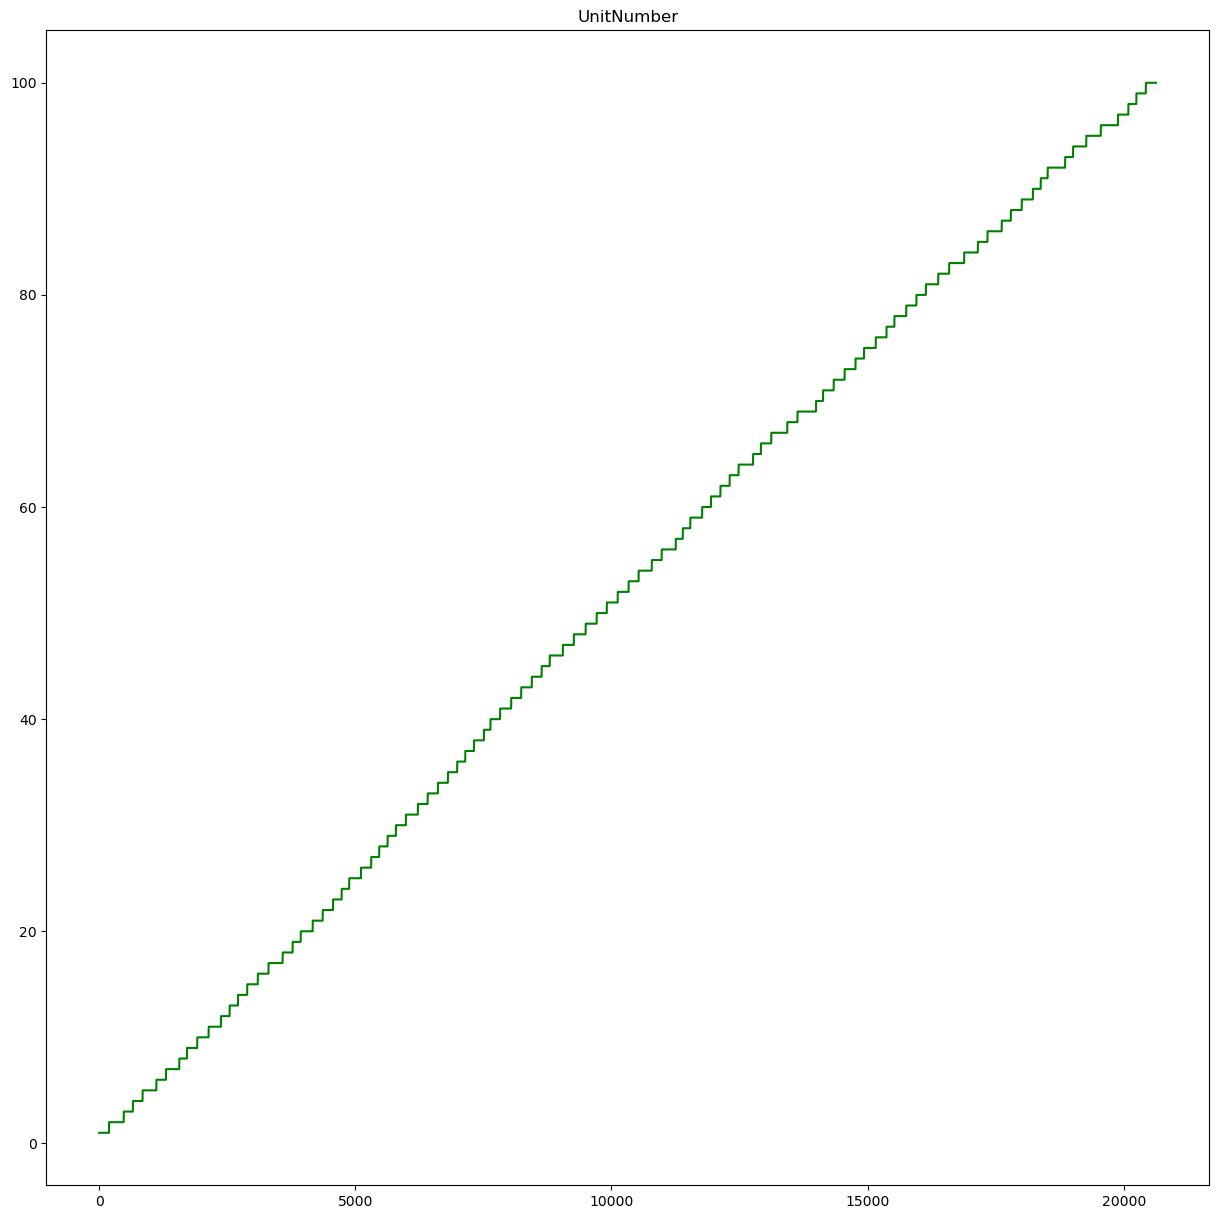

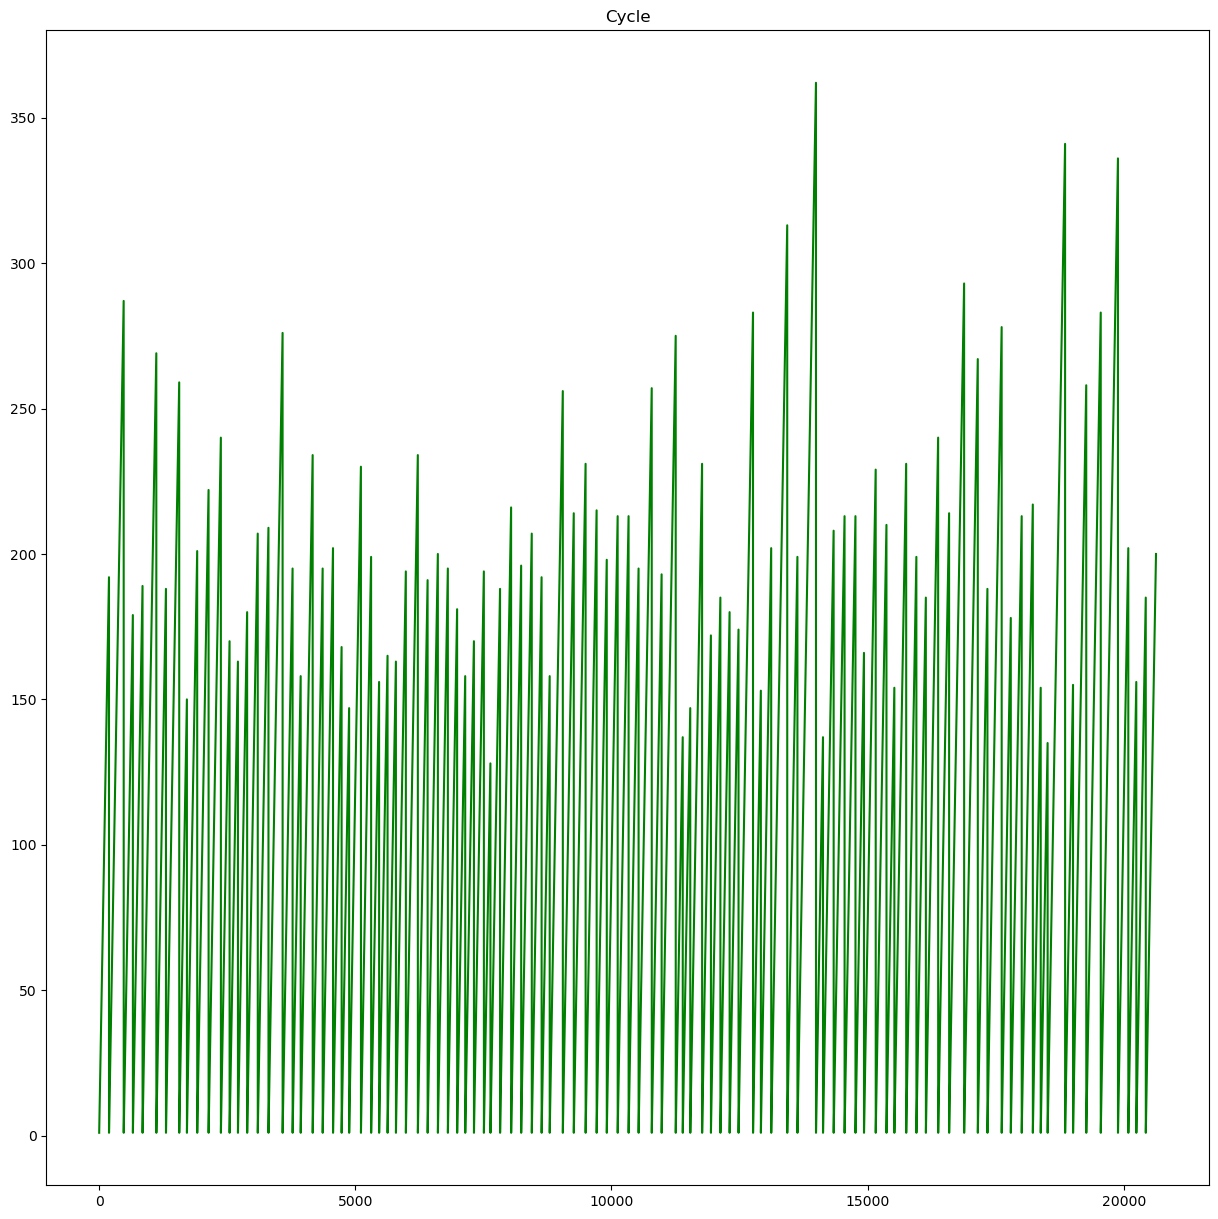

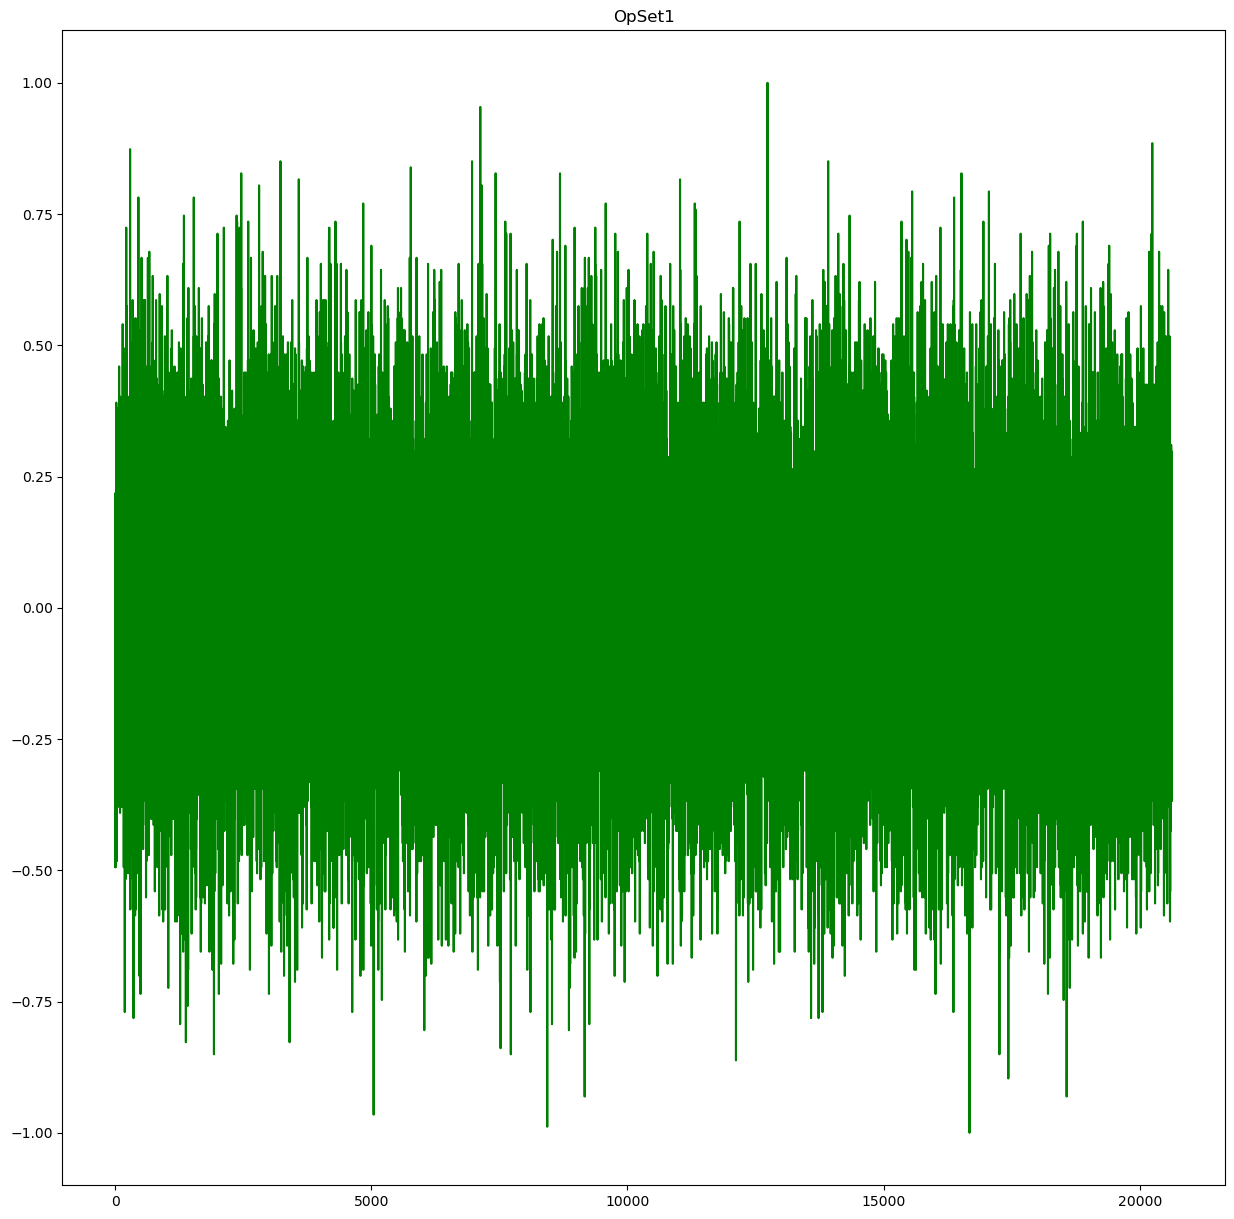

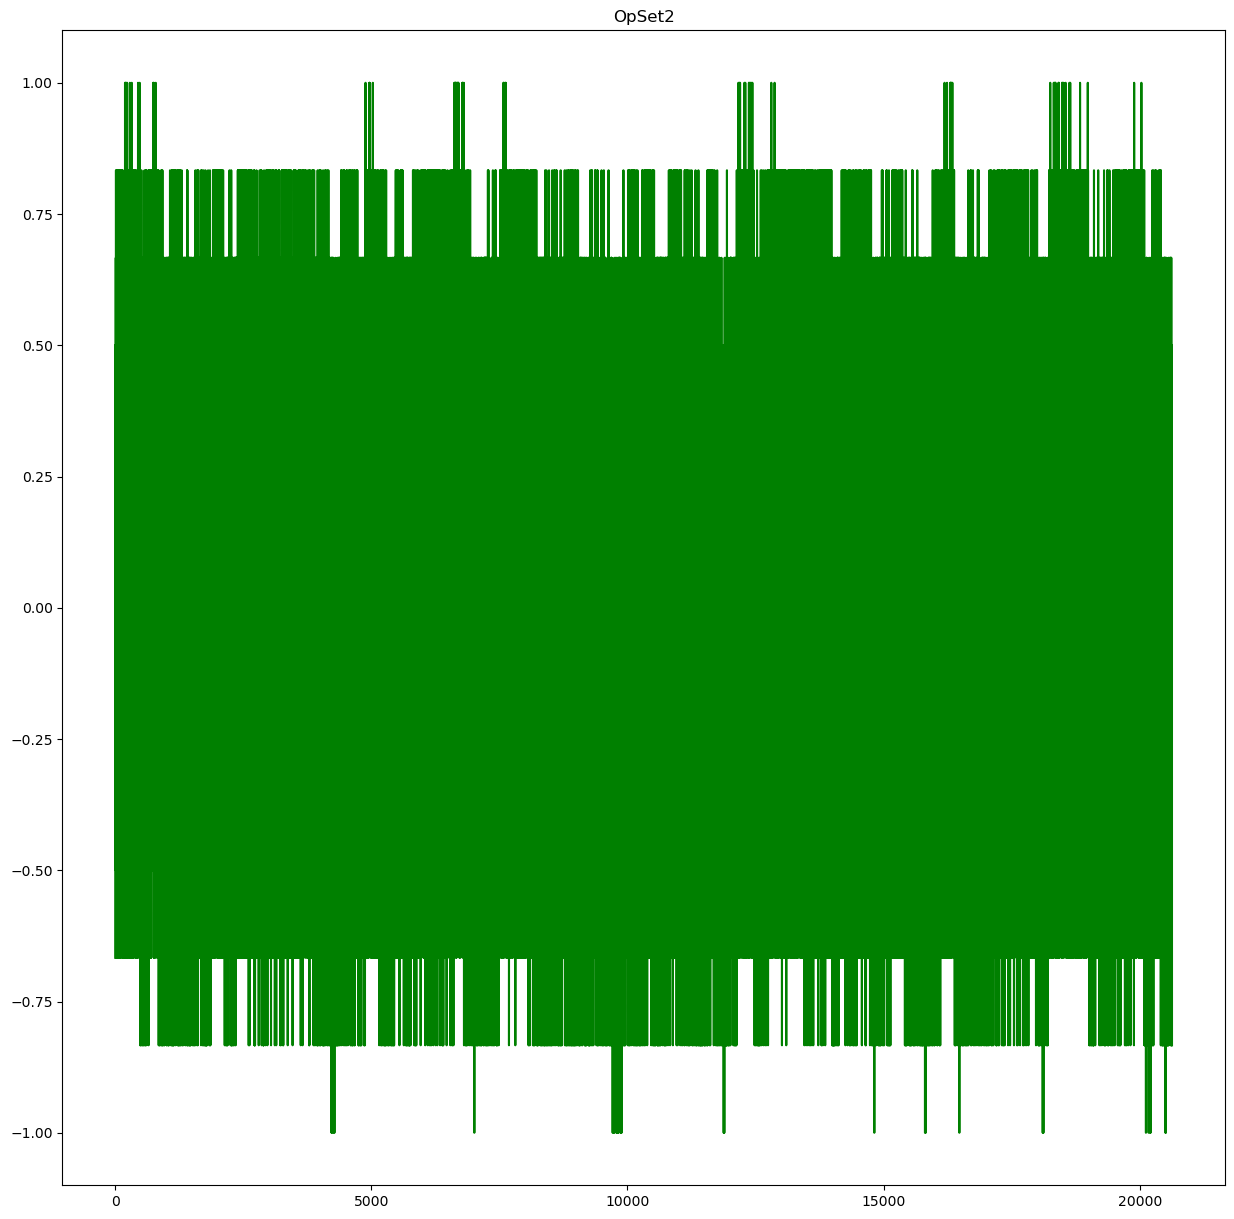

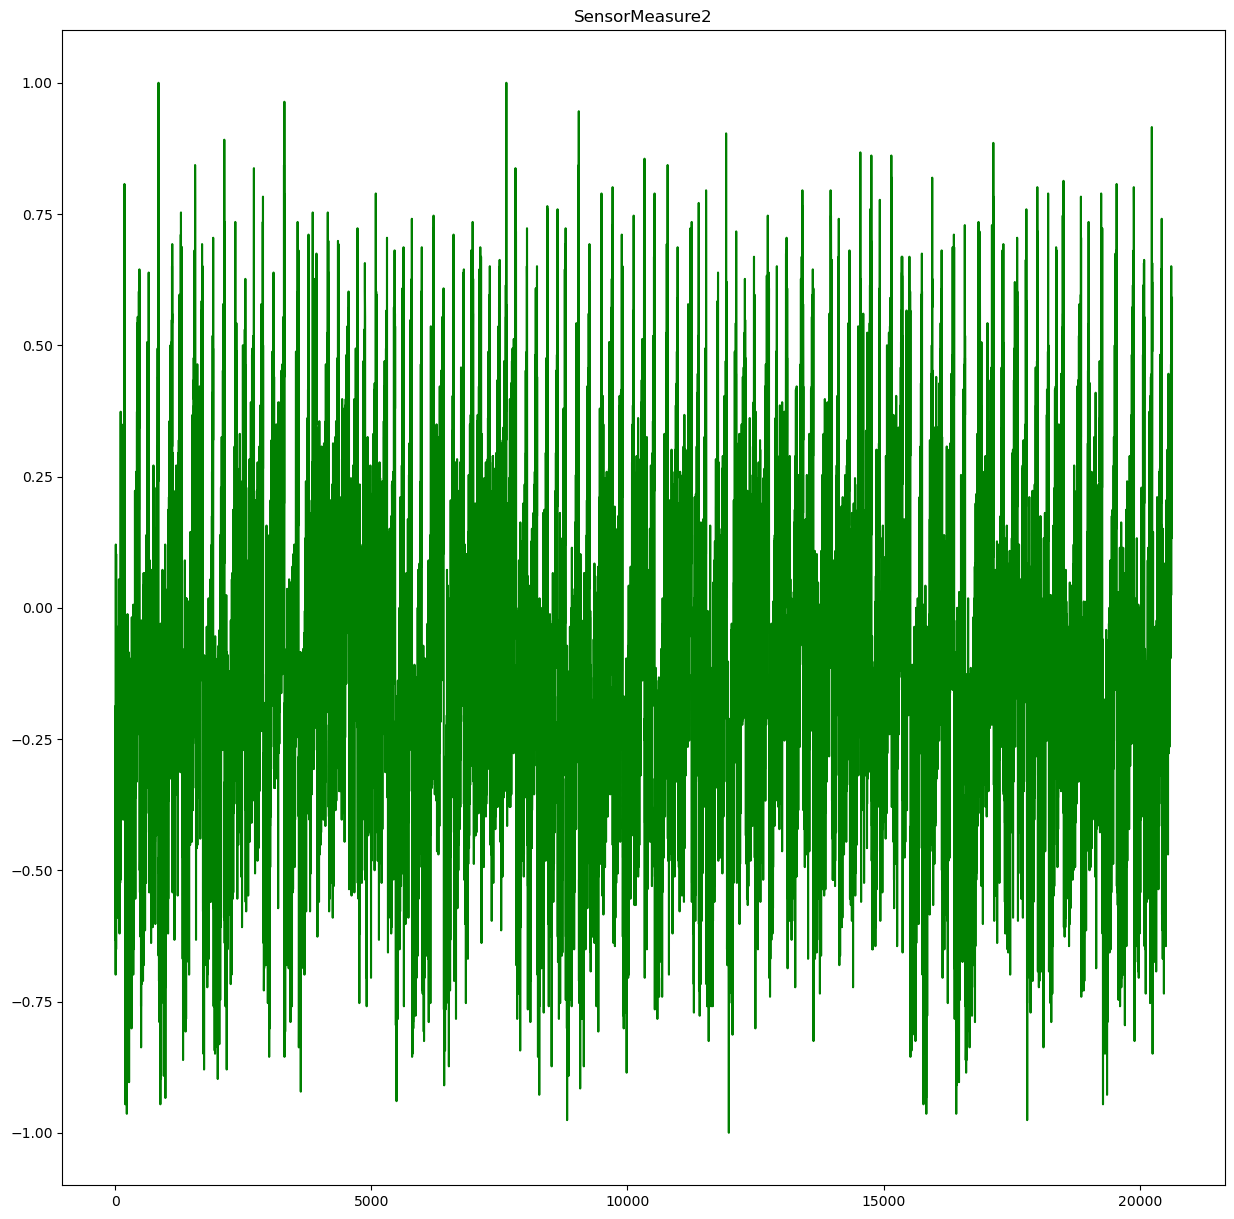

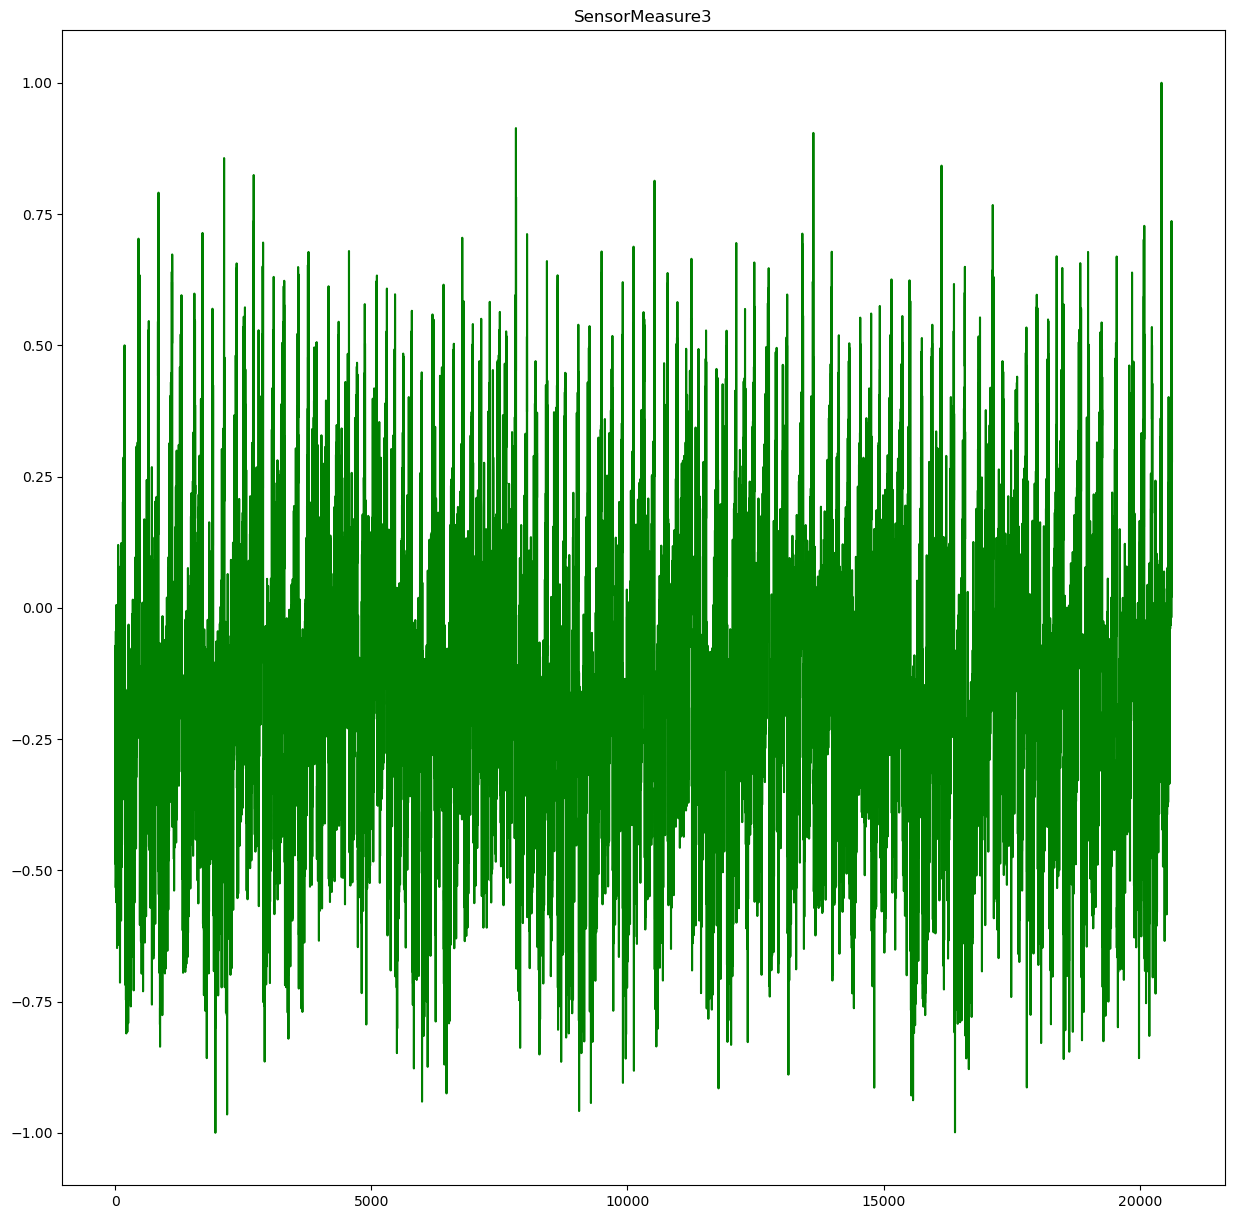

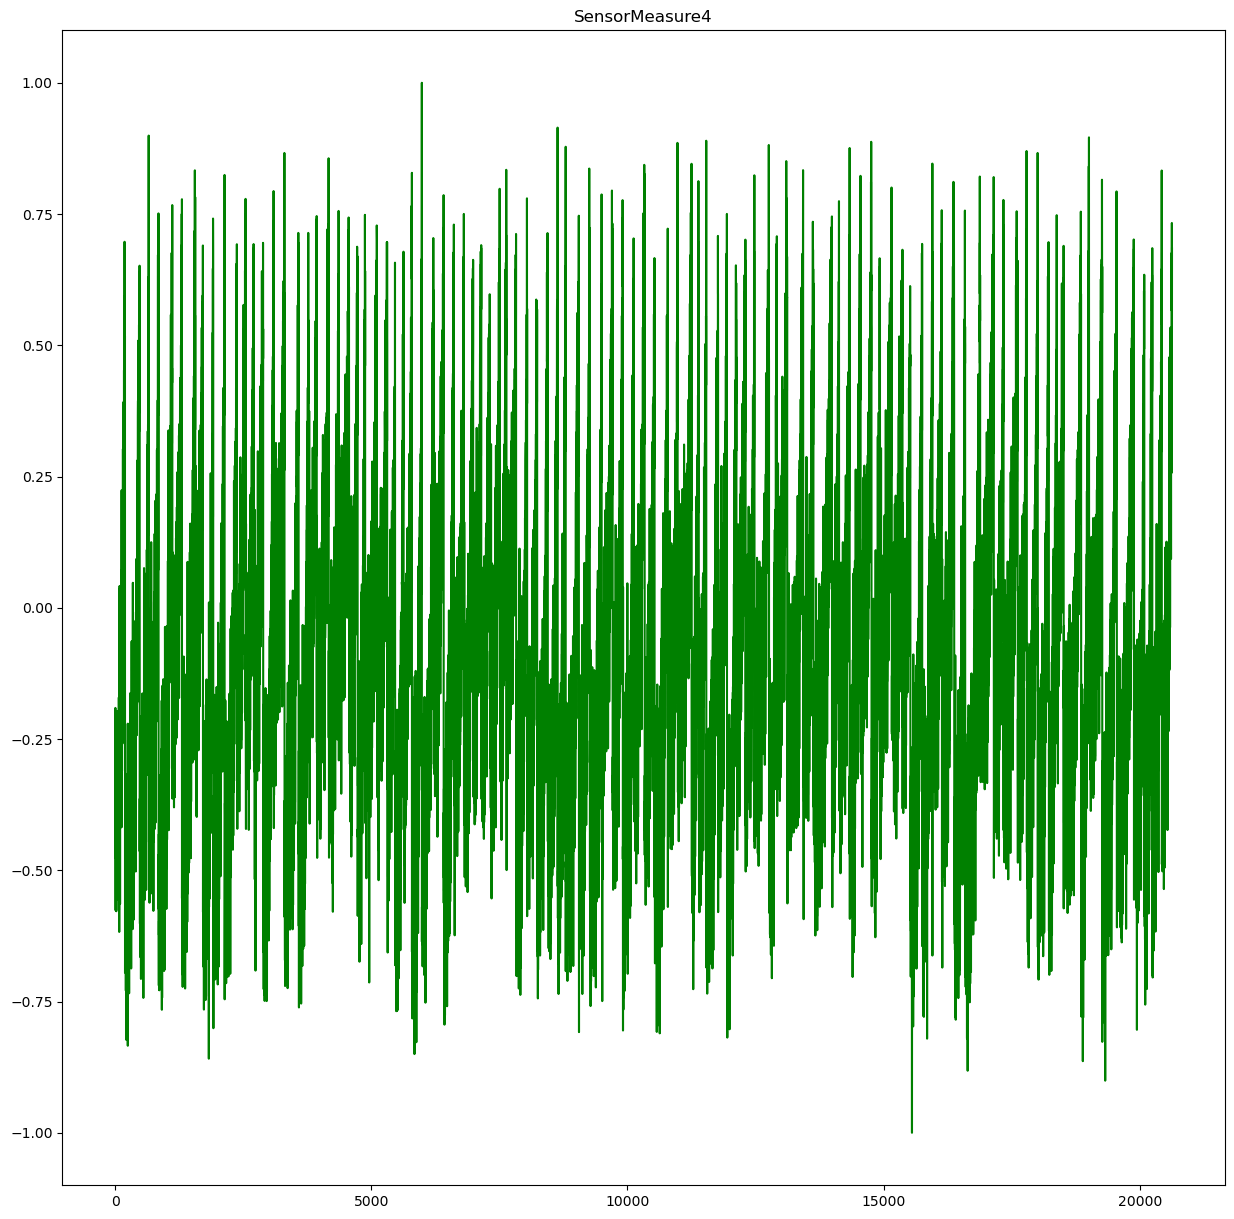

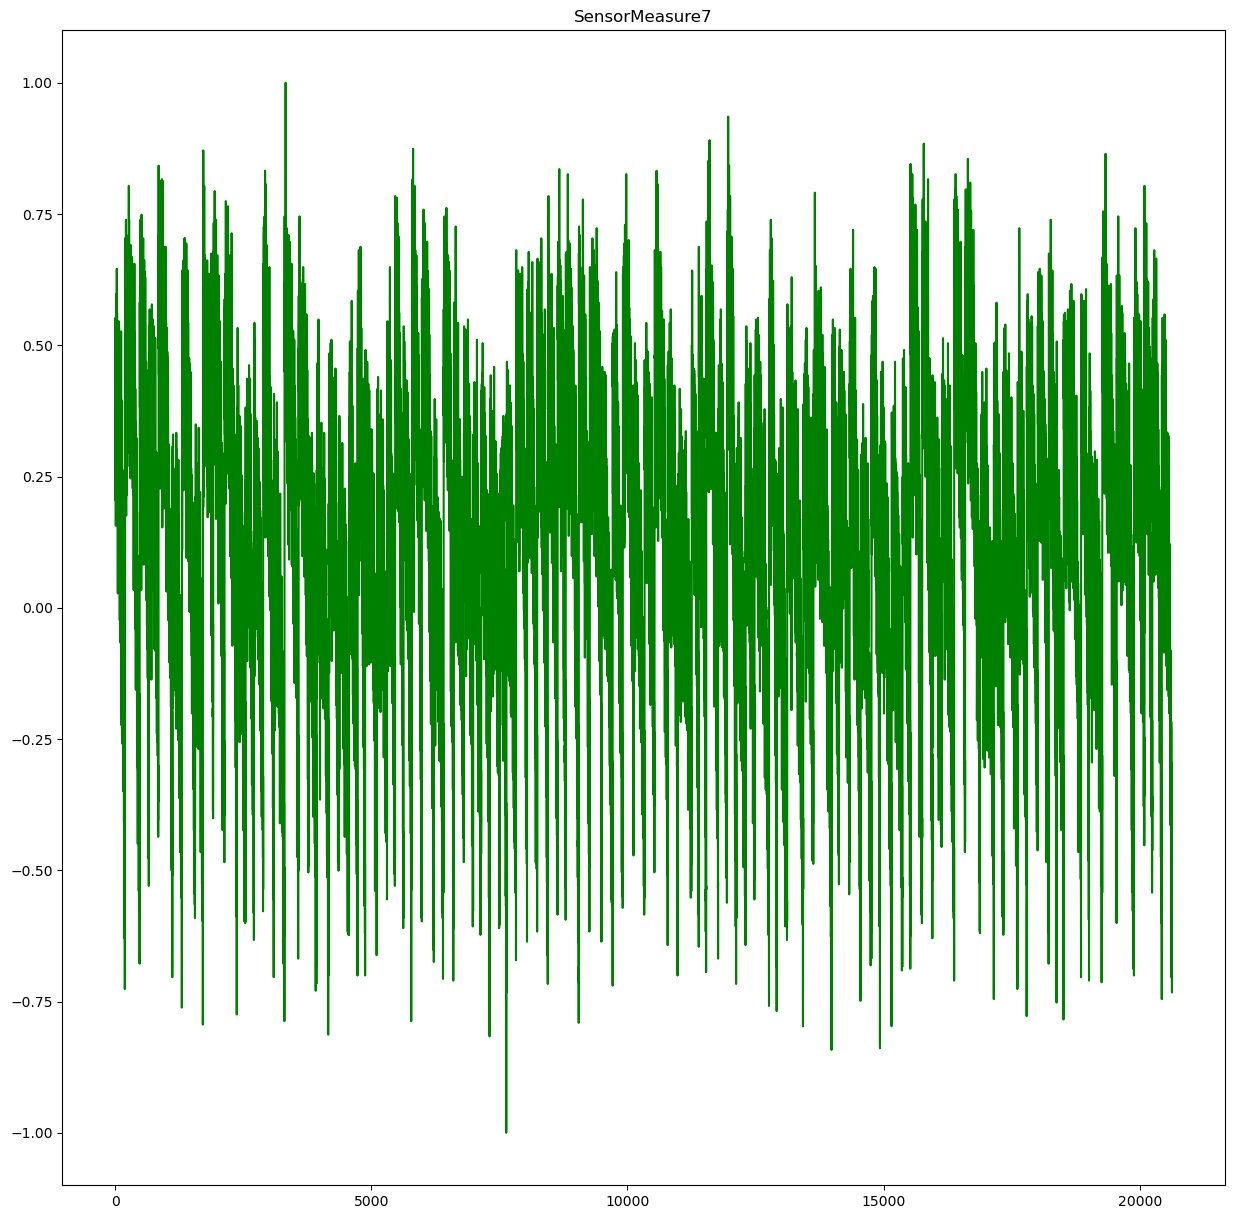

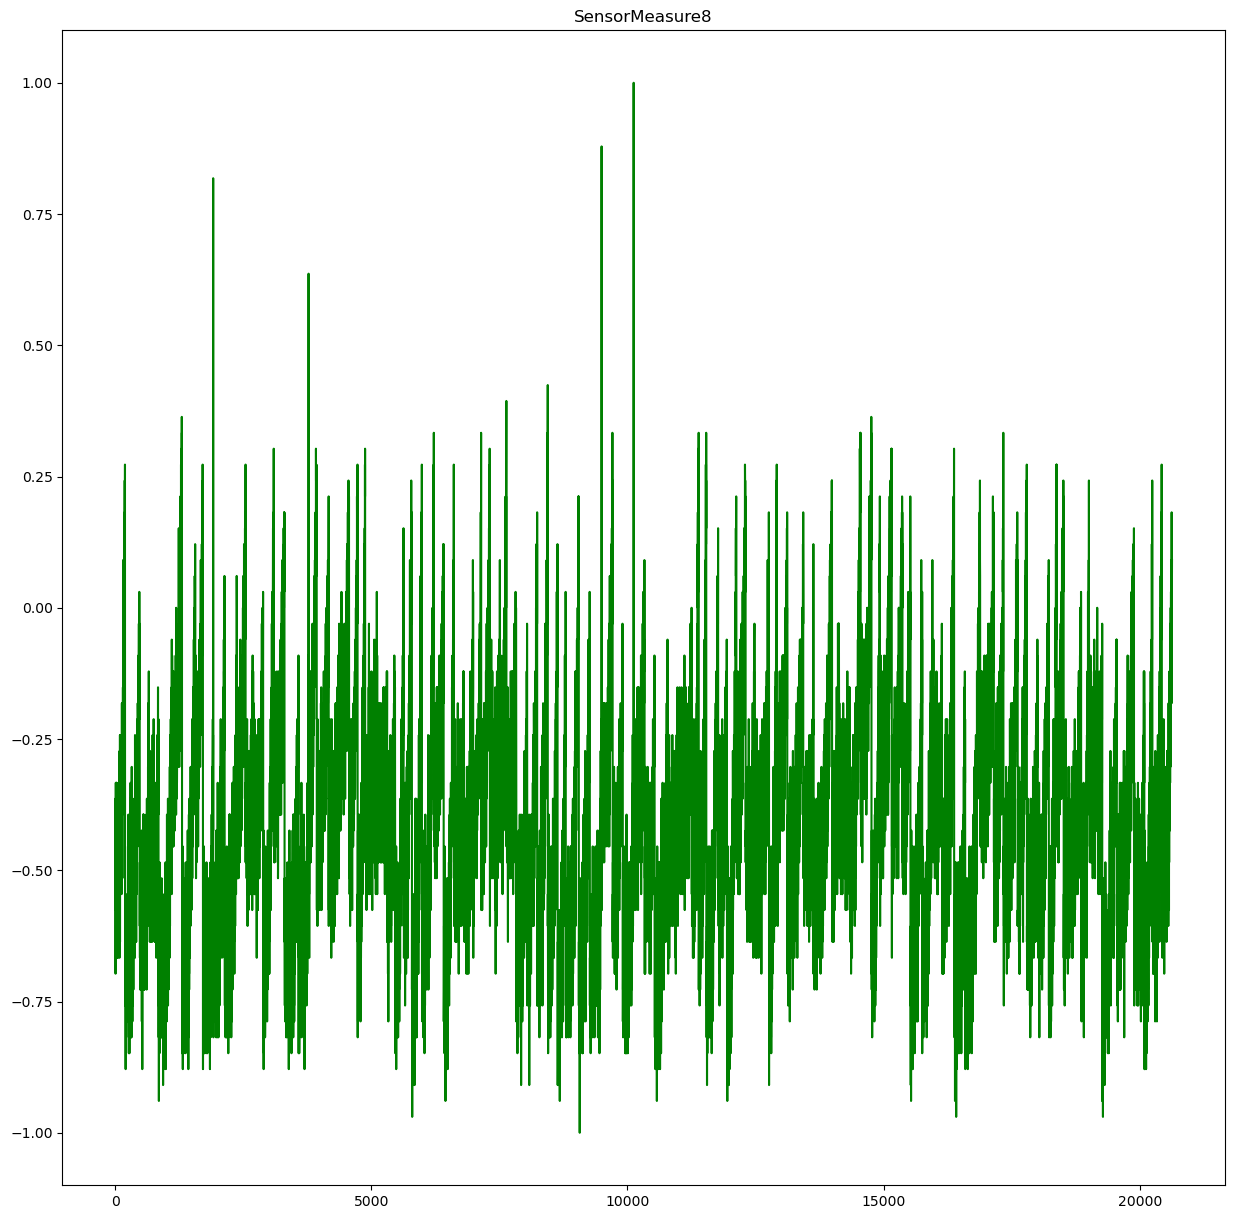

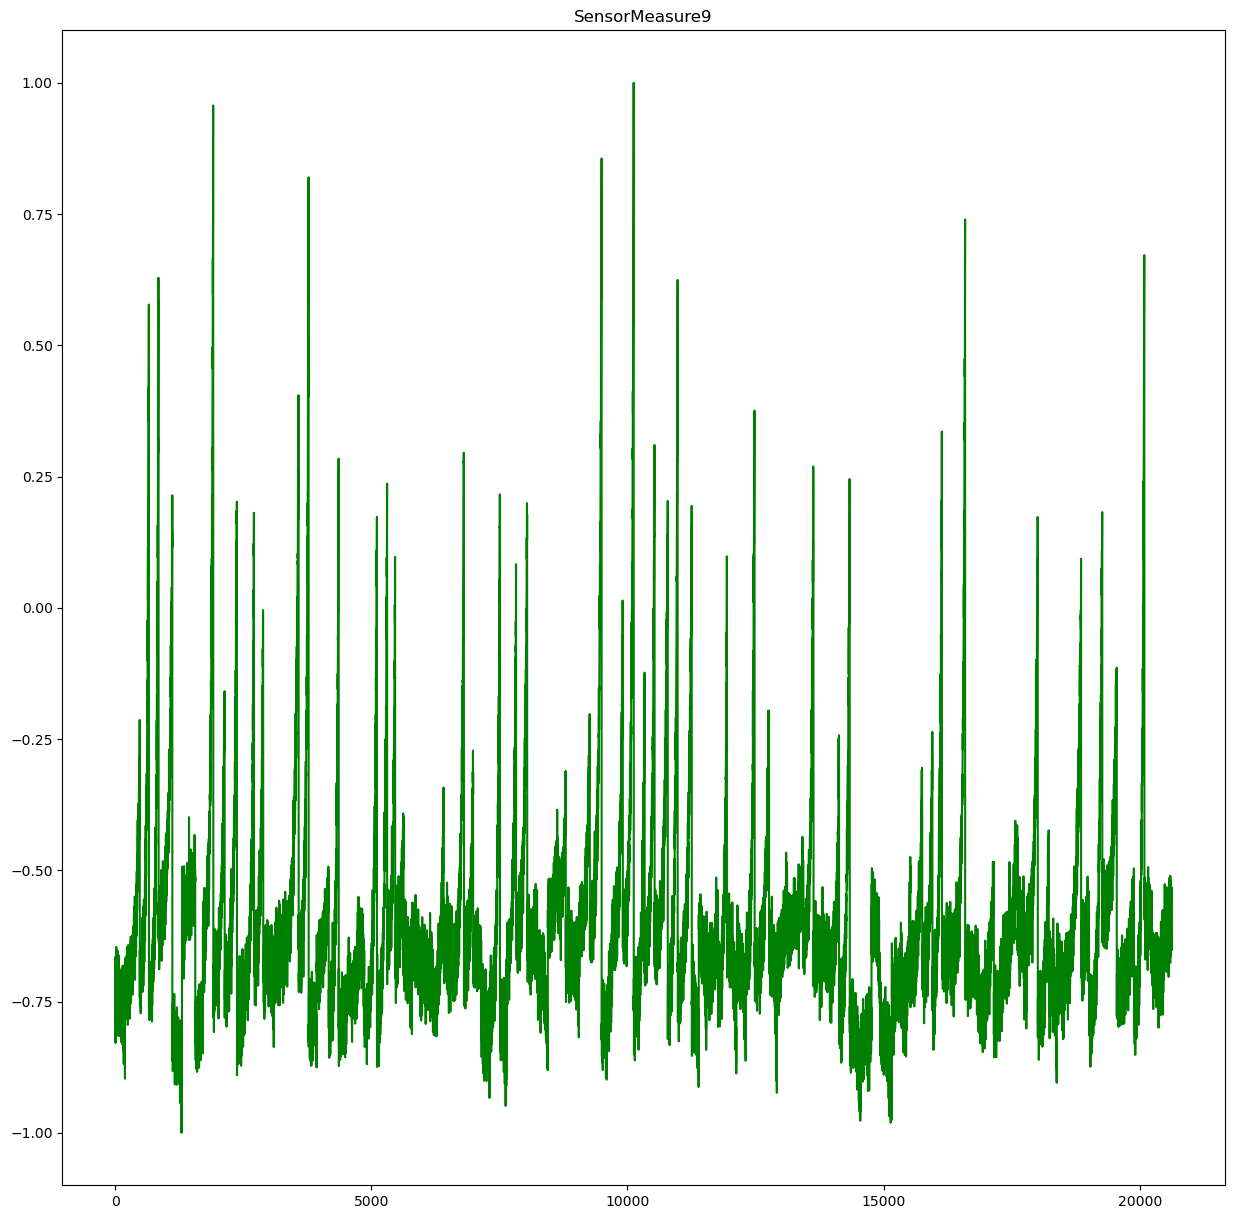

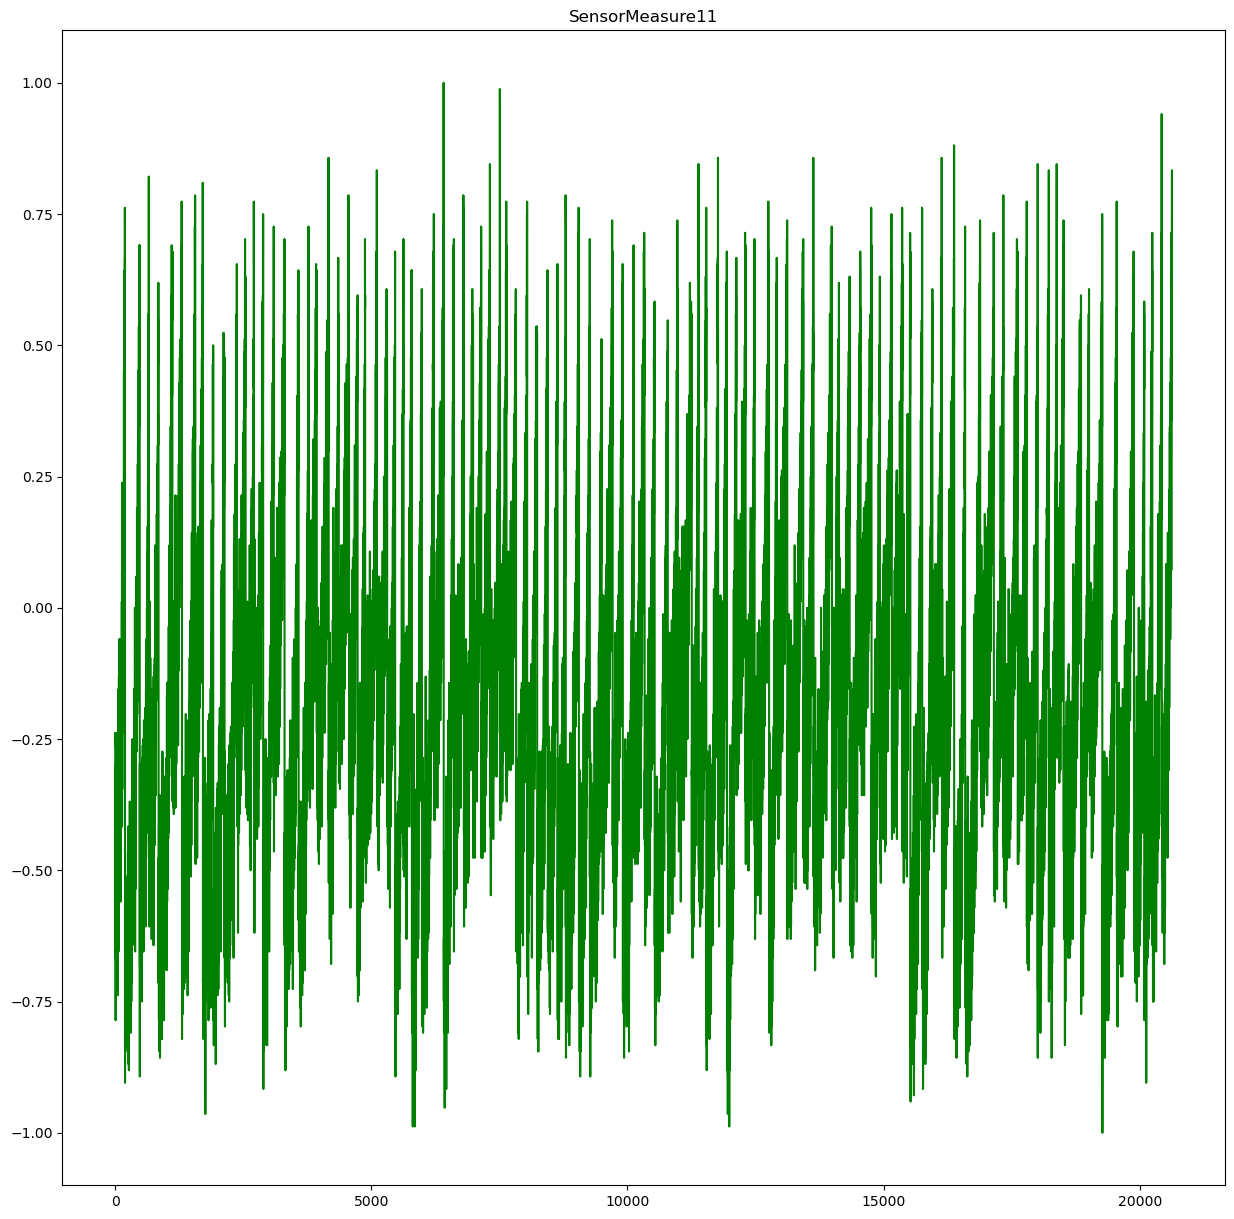

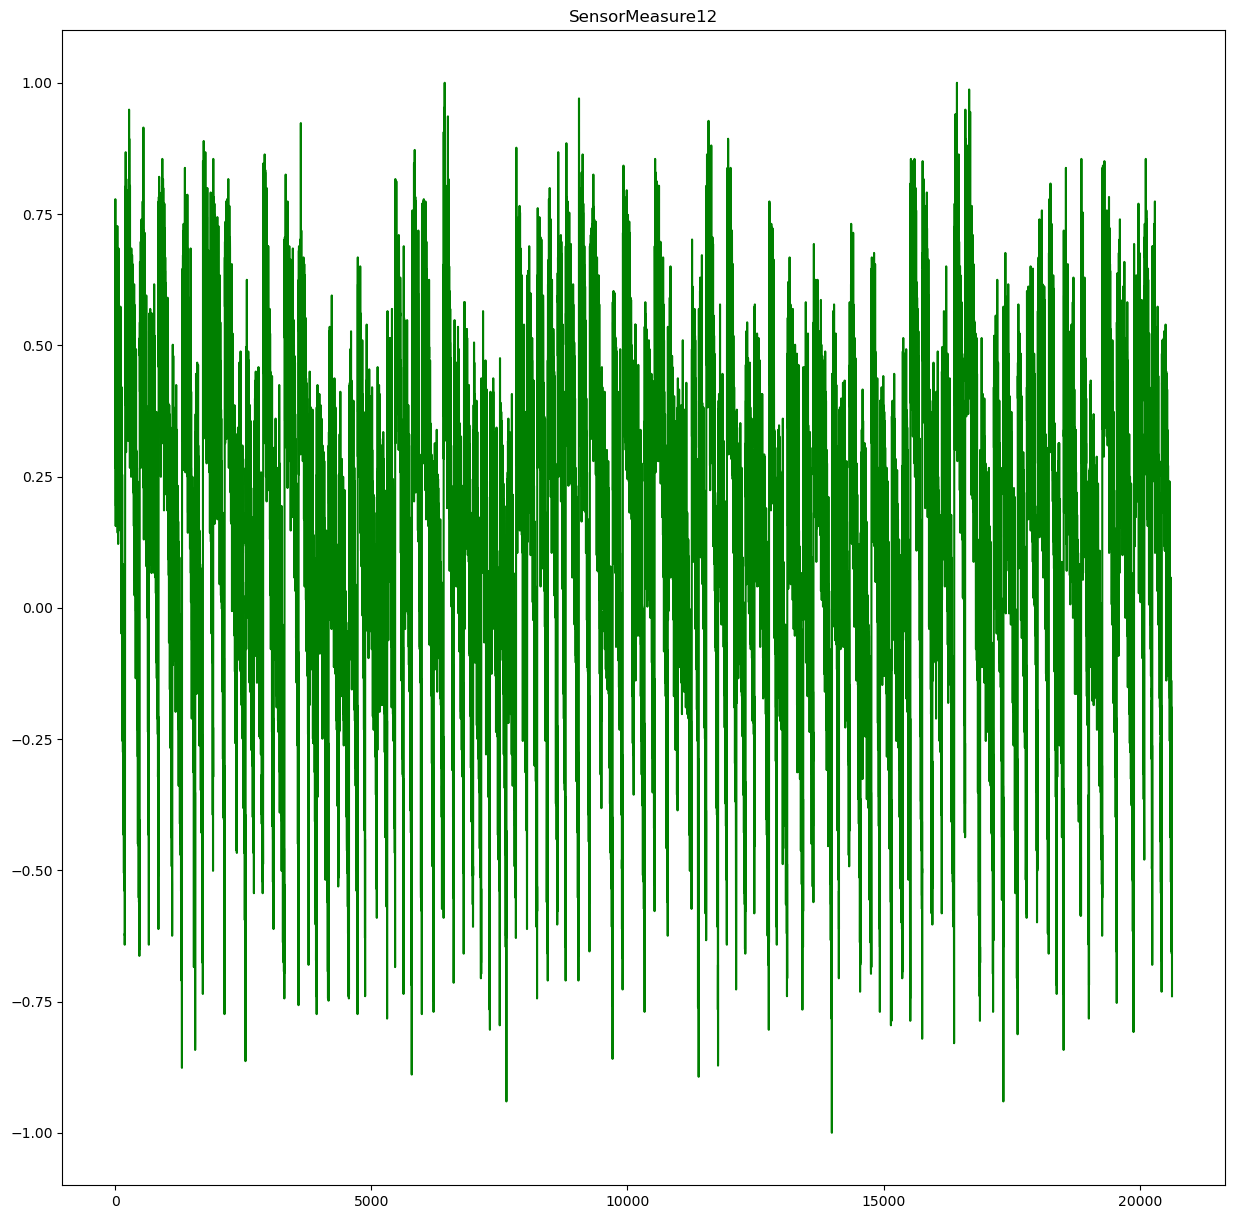

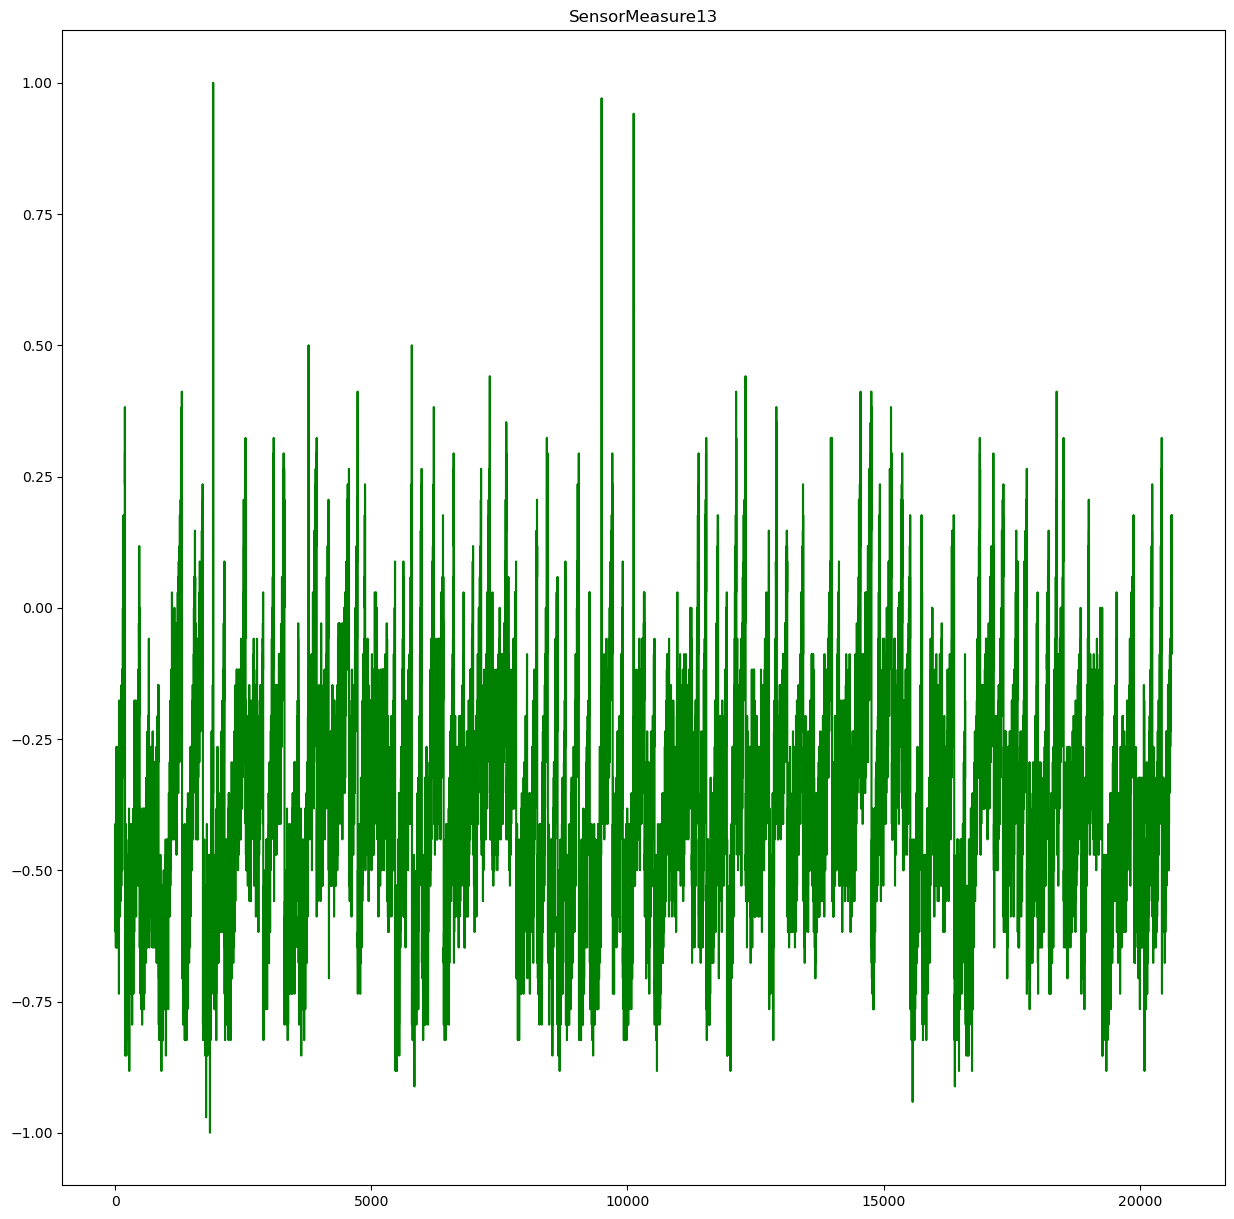

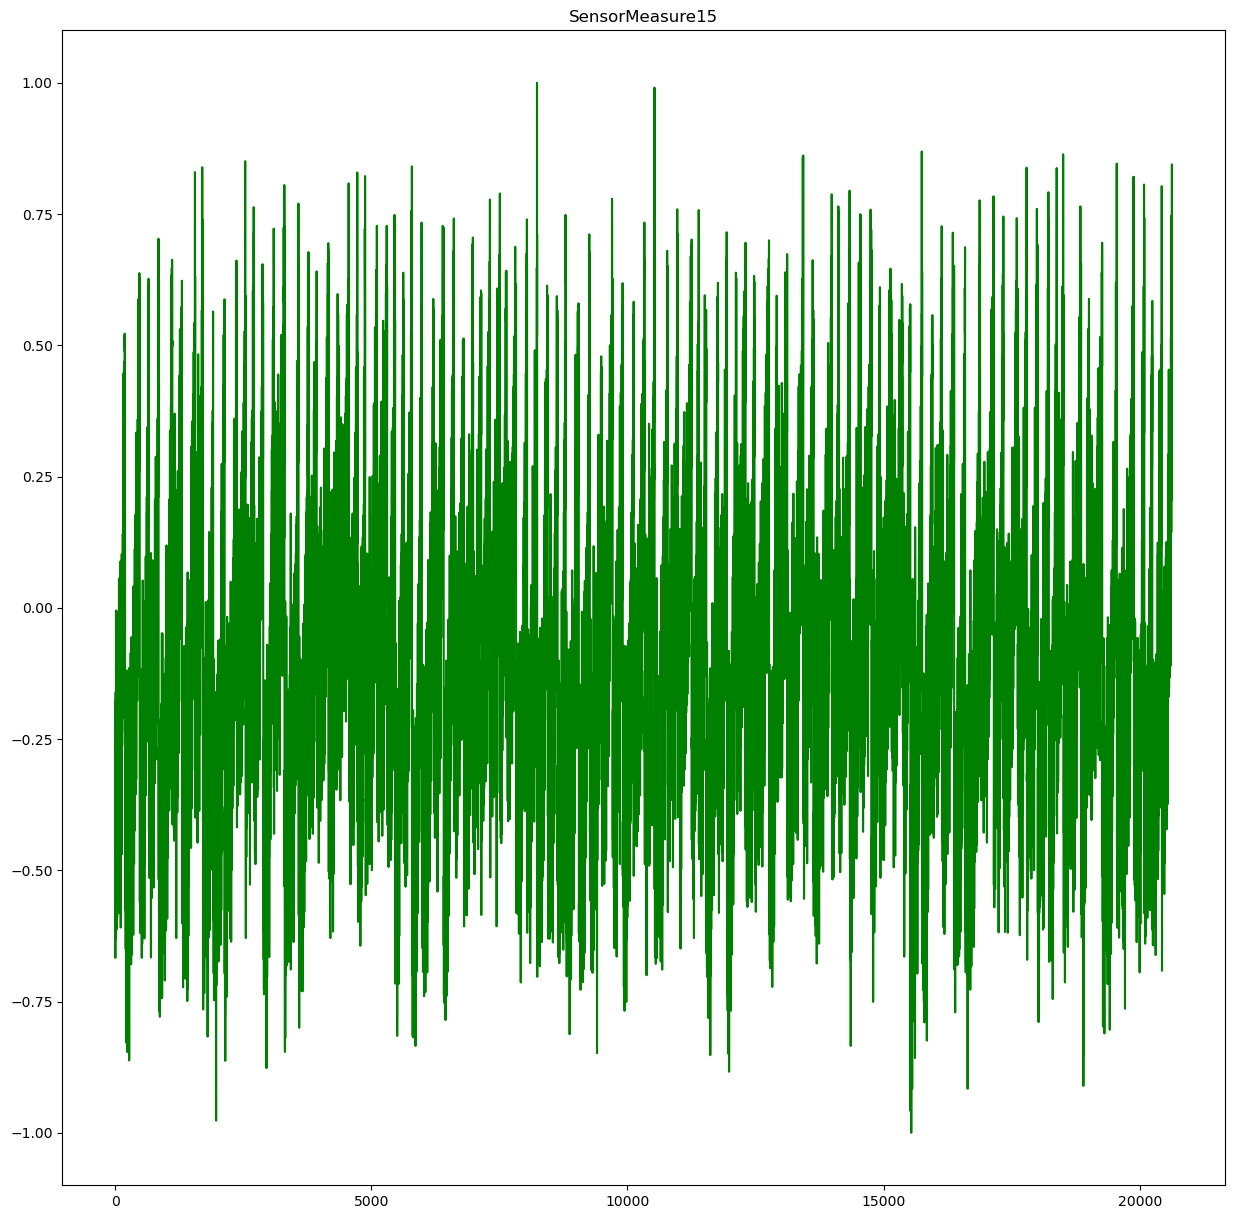

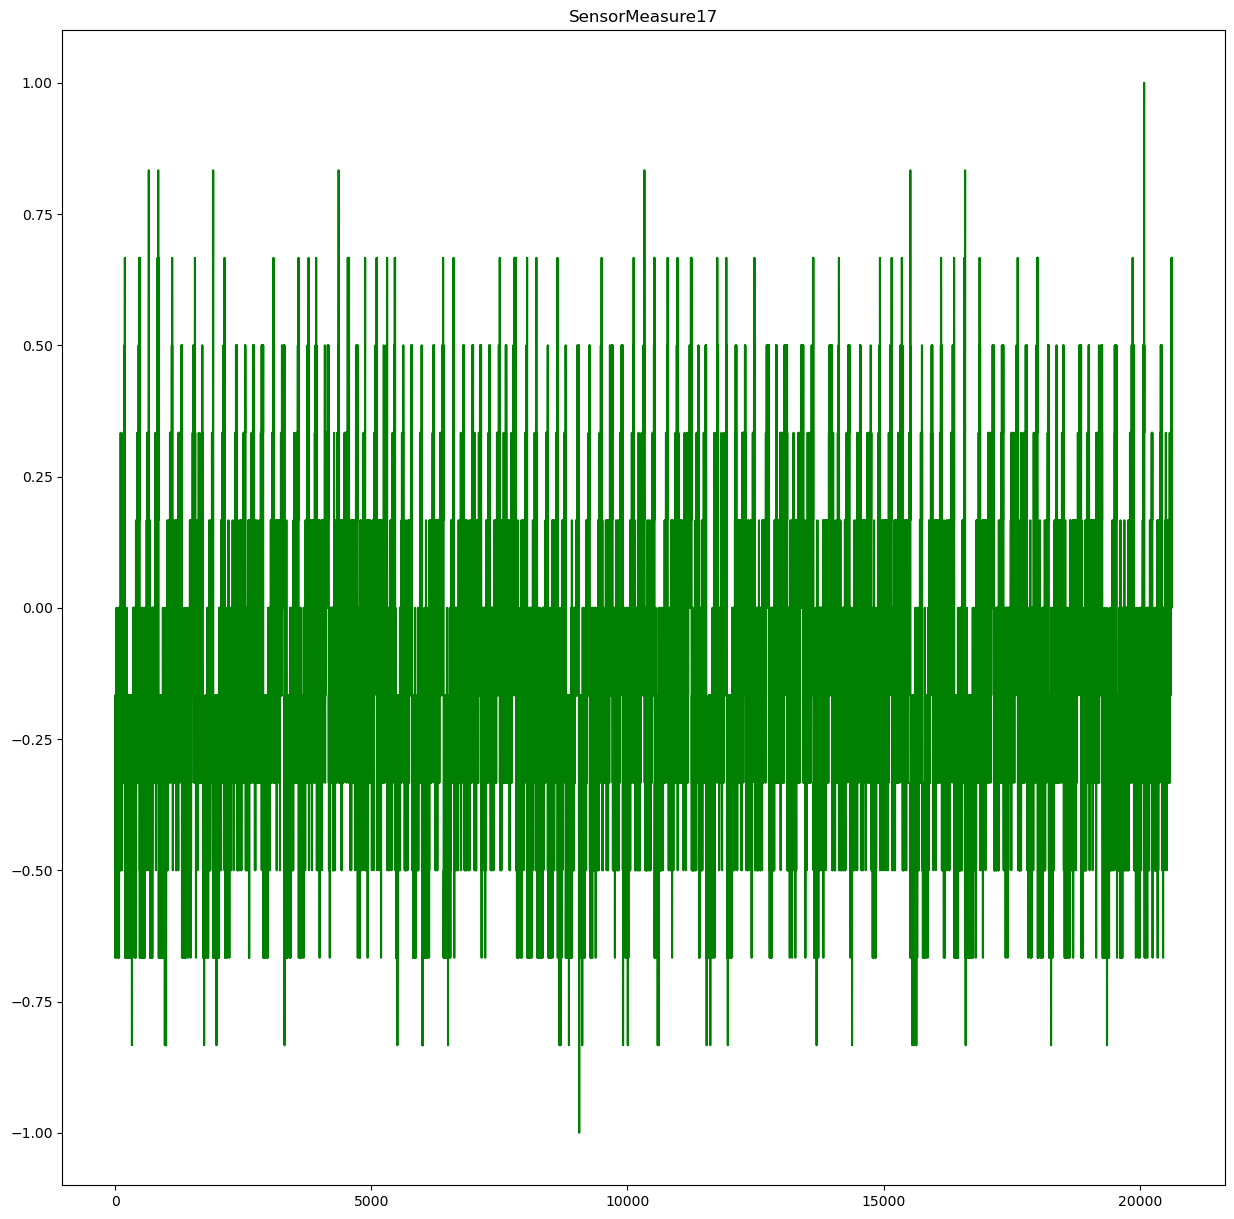

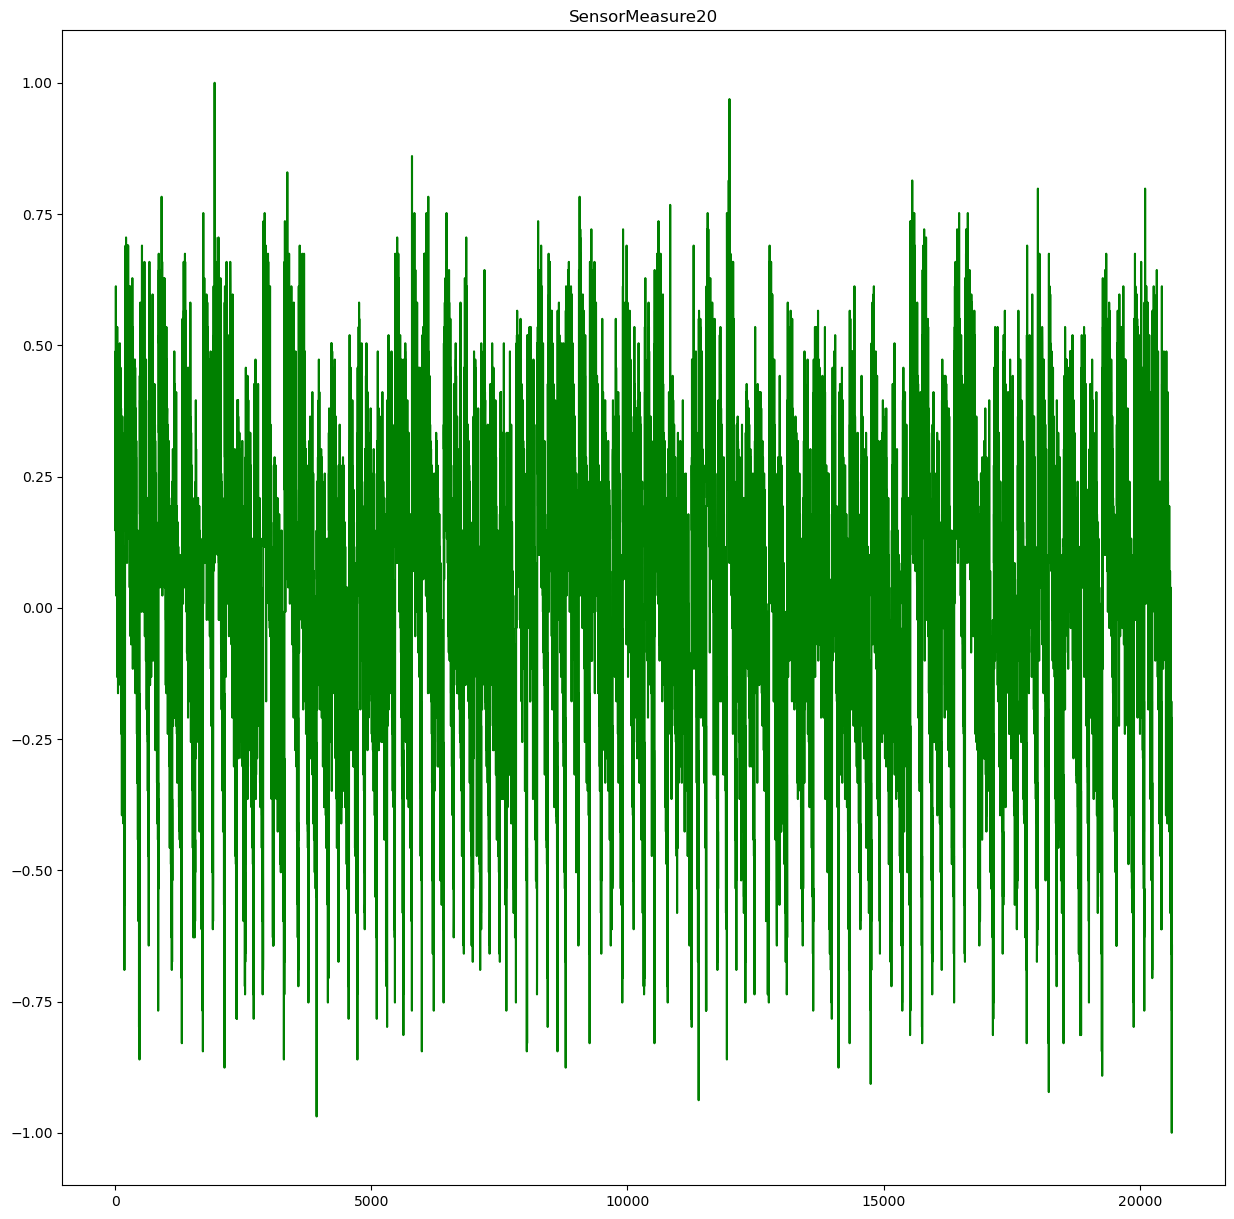

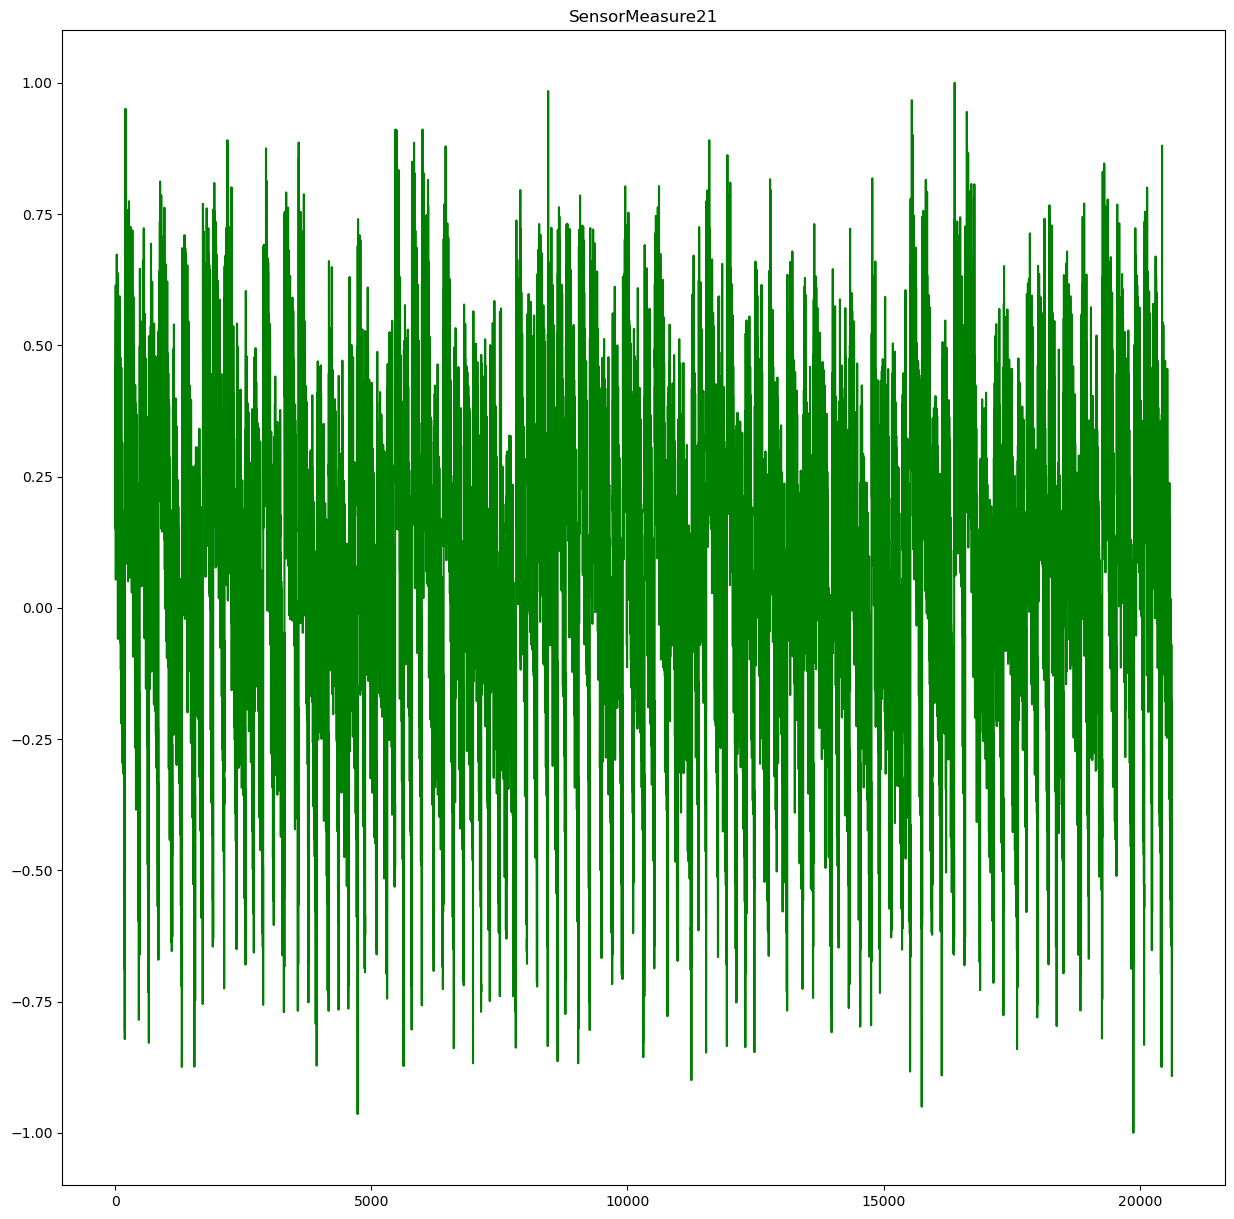

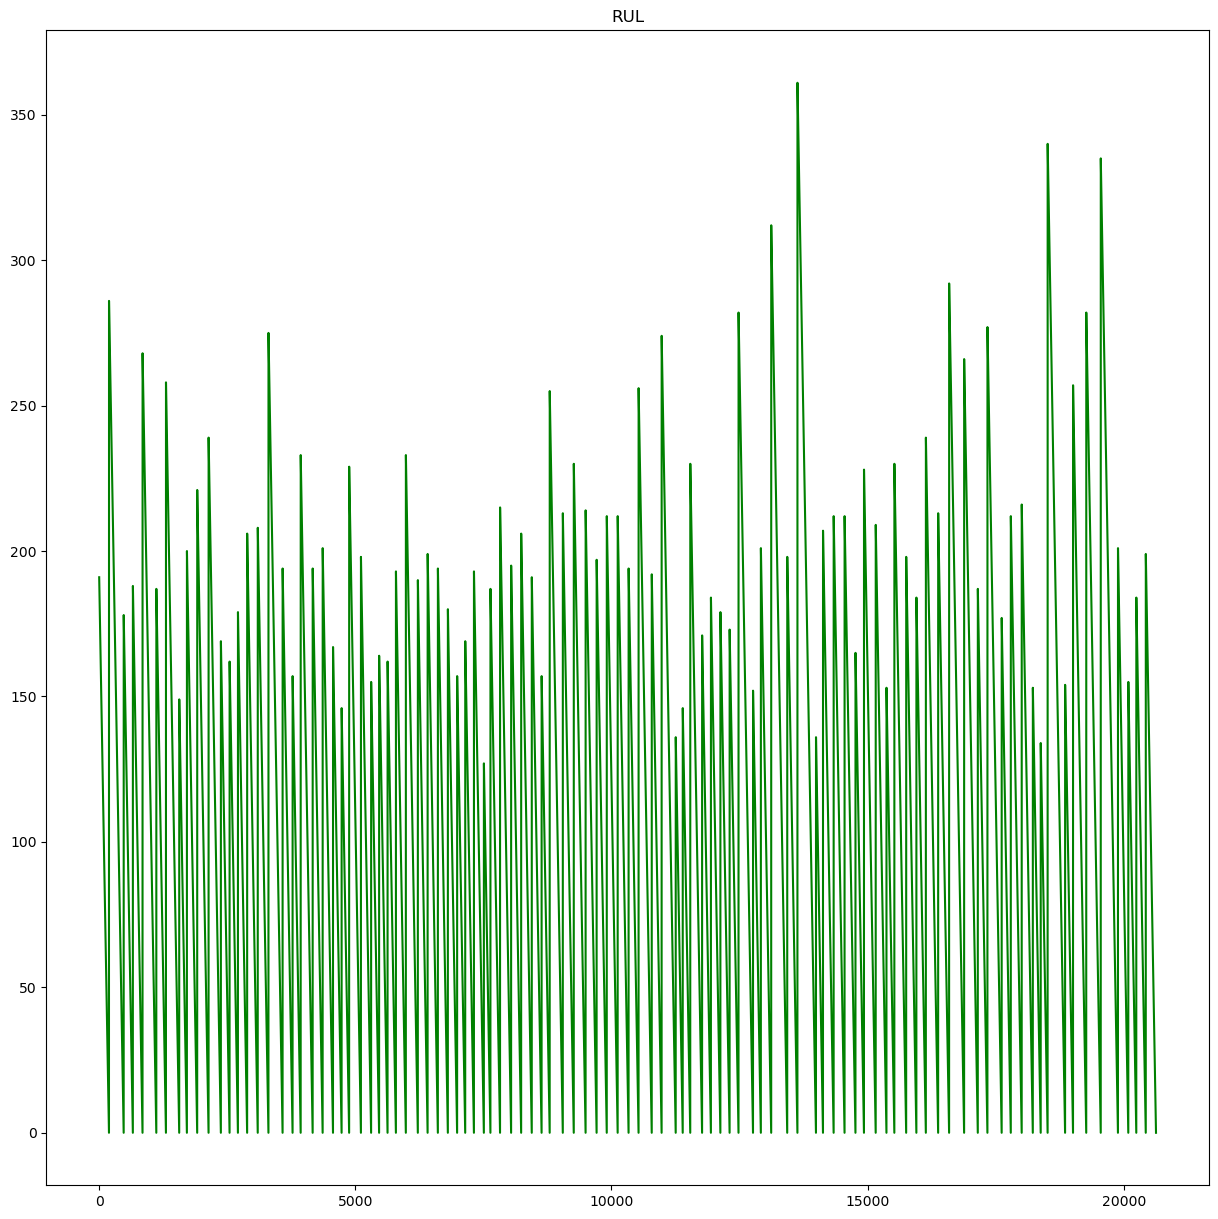

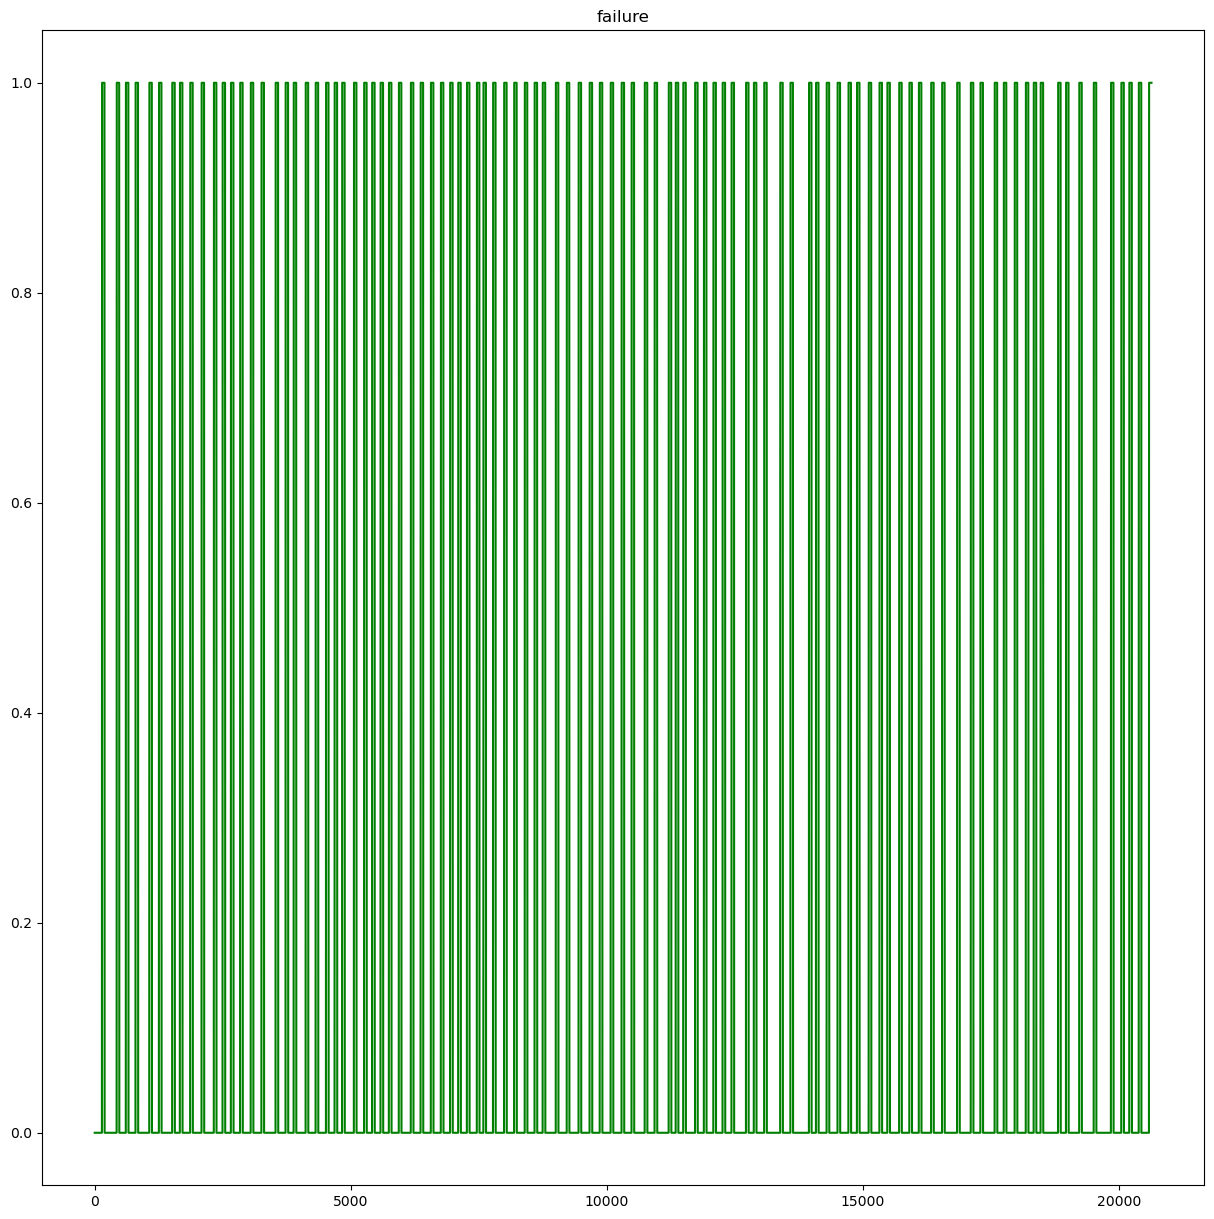

In [15]:
for i in df_train:
    mlp.figure(figsize=(15,15))
    df_train[i].plot(color='green')
    mlp.title(i)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='failure', ylabel='count'>

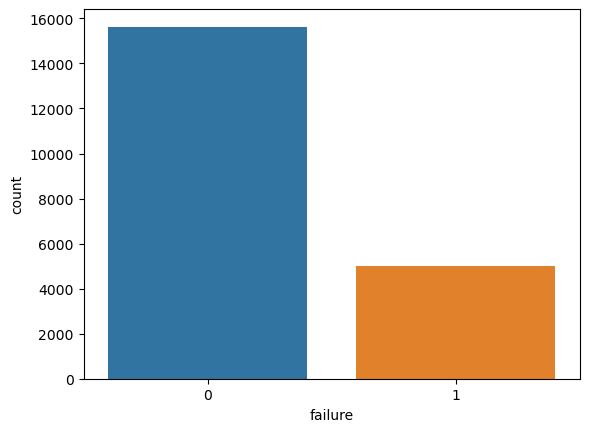

In [16]:
sn.countplot(df_train['failure'])

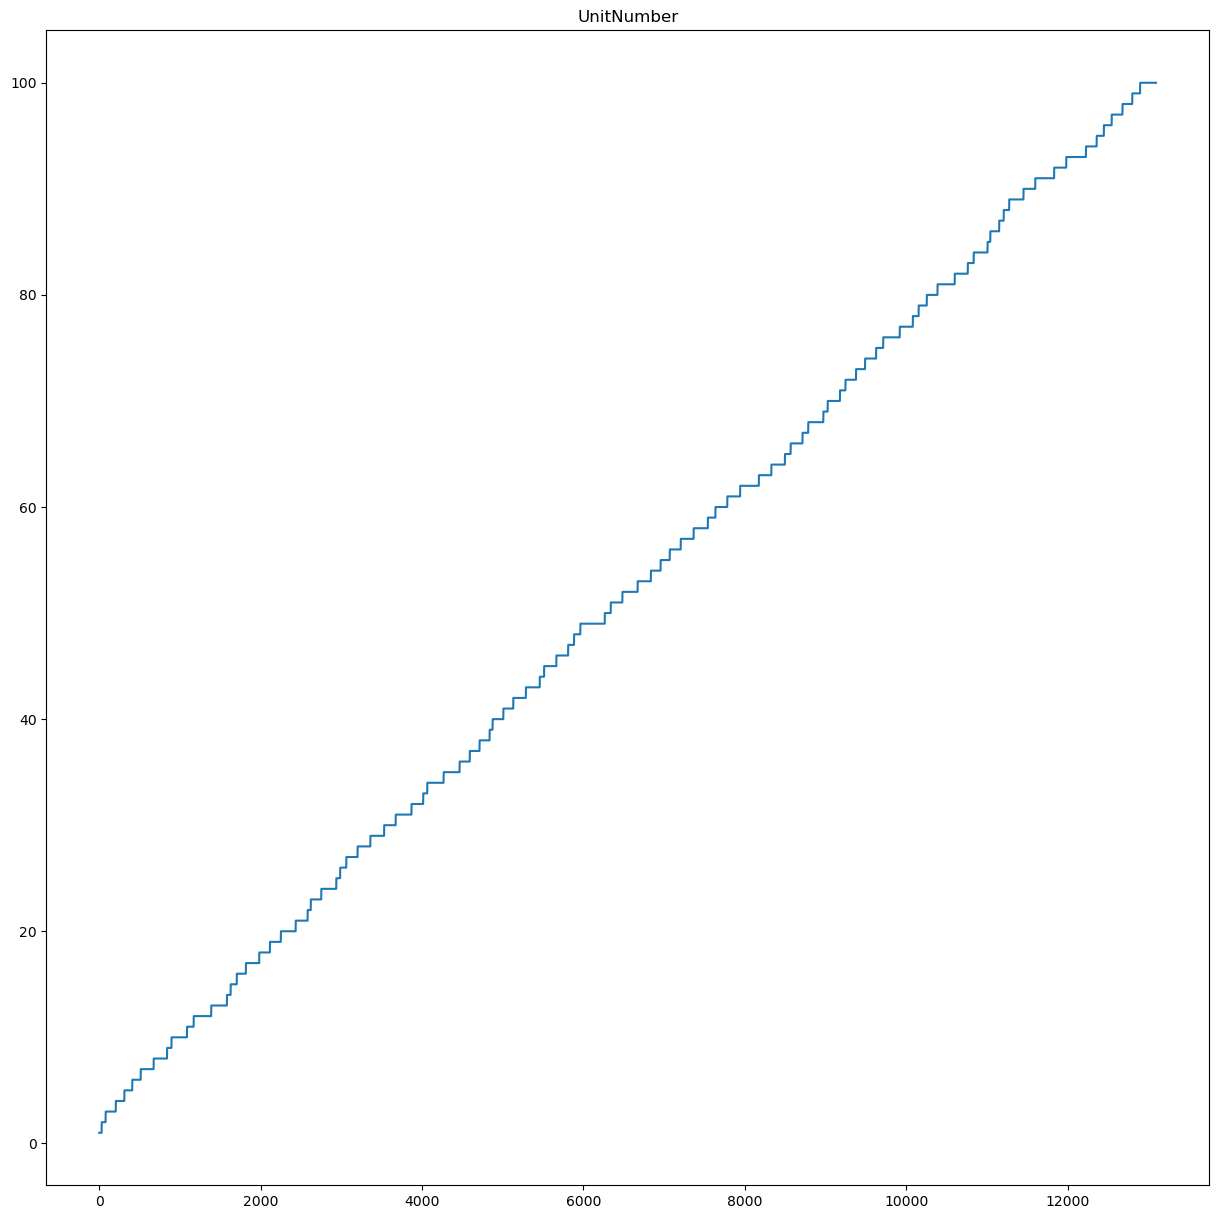

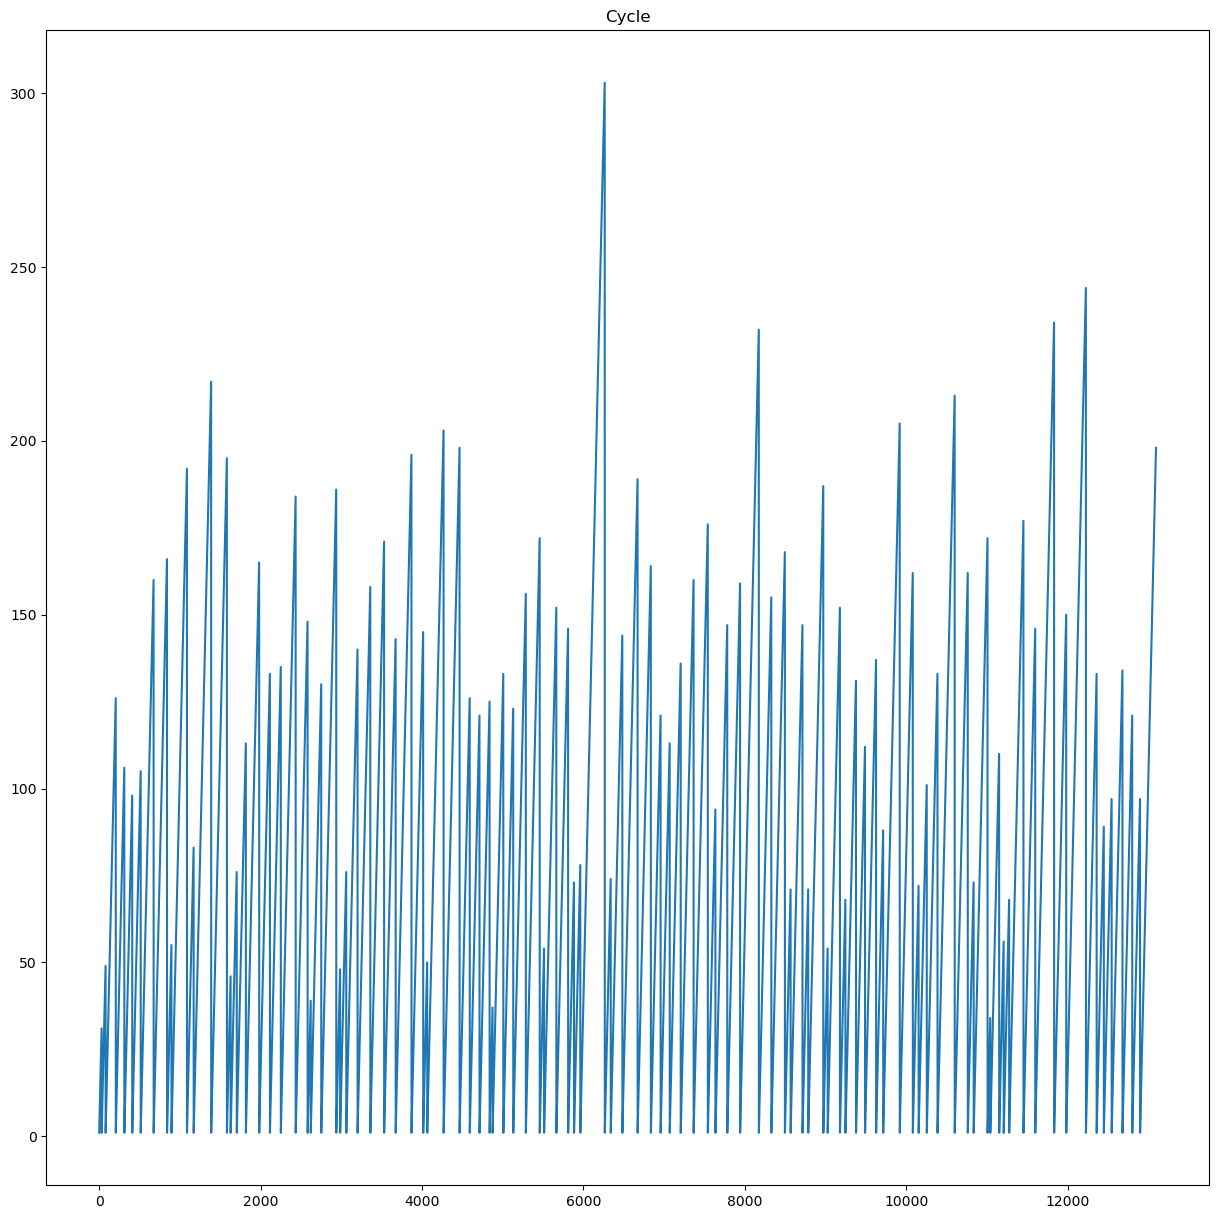

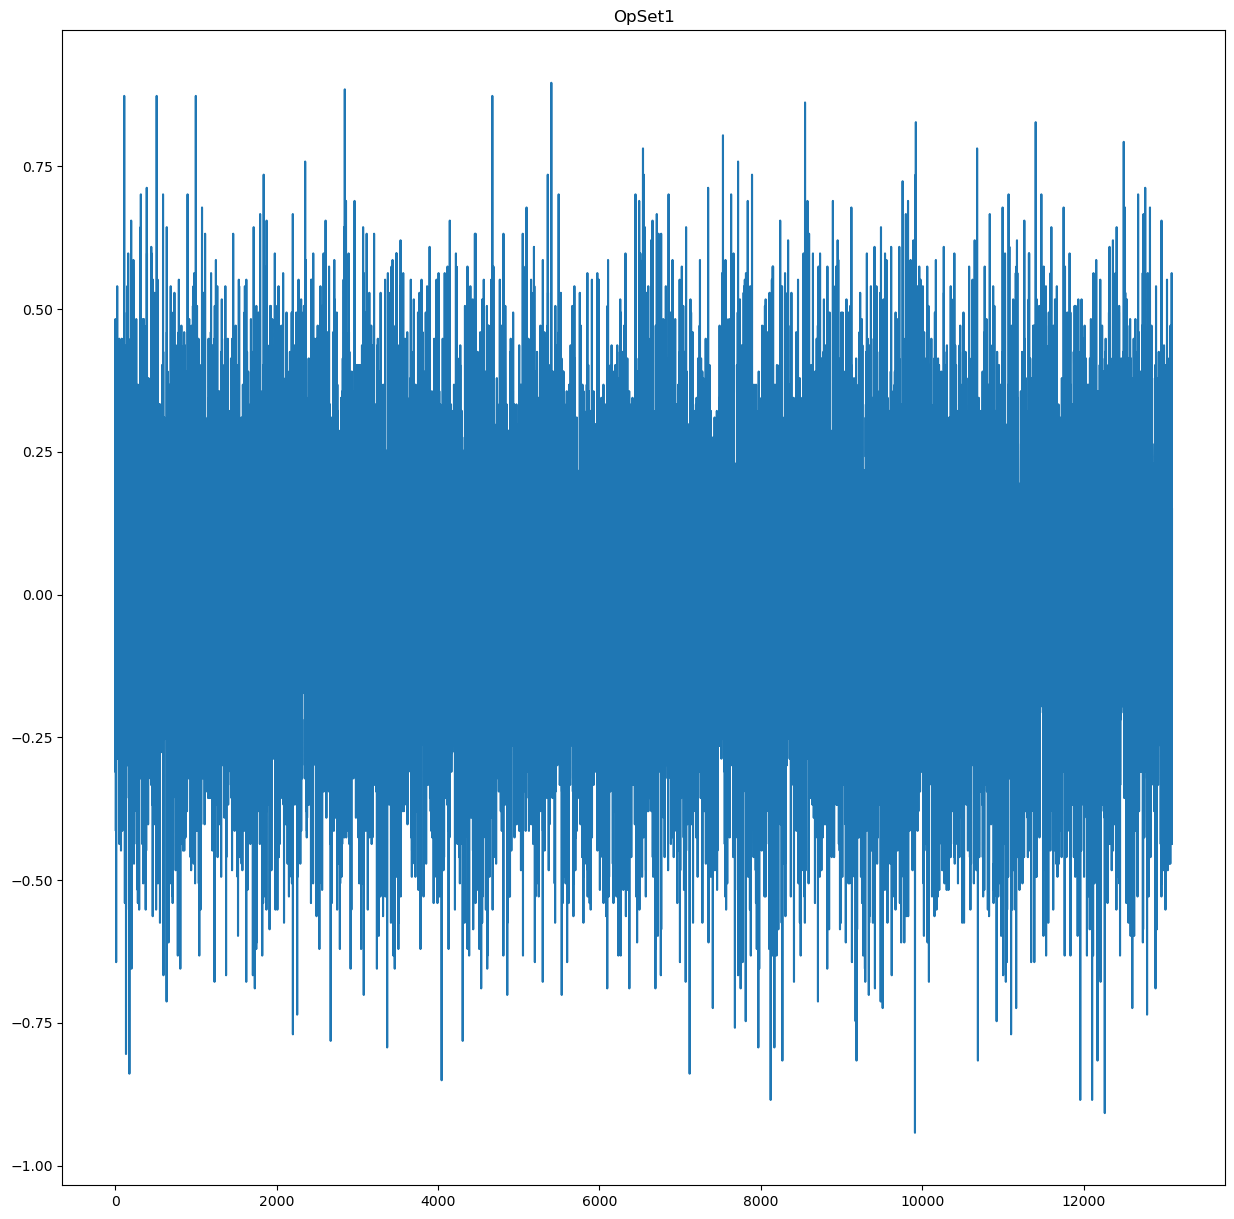

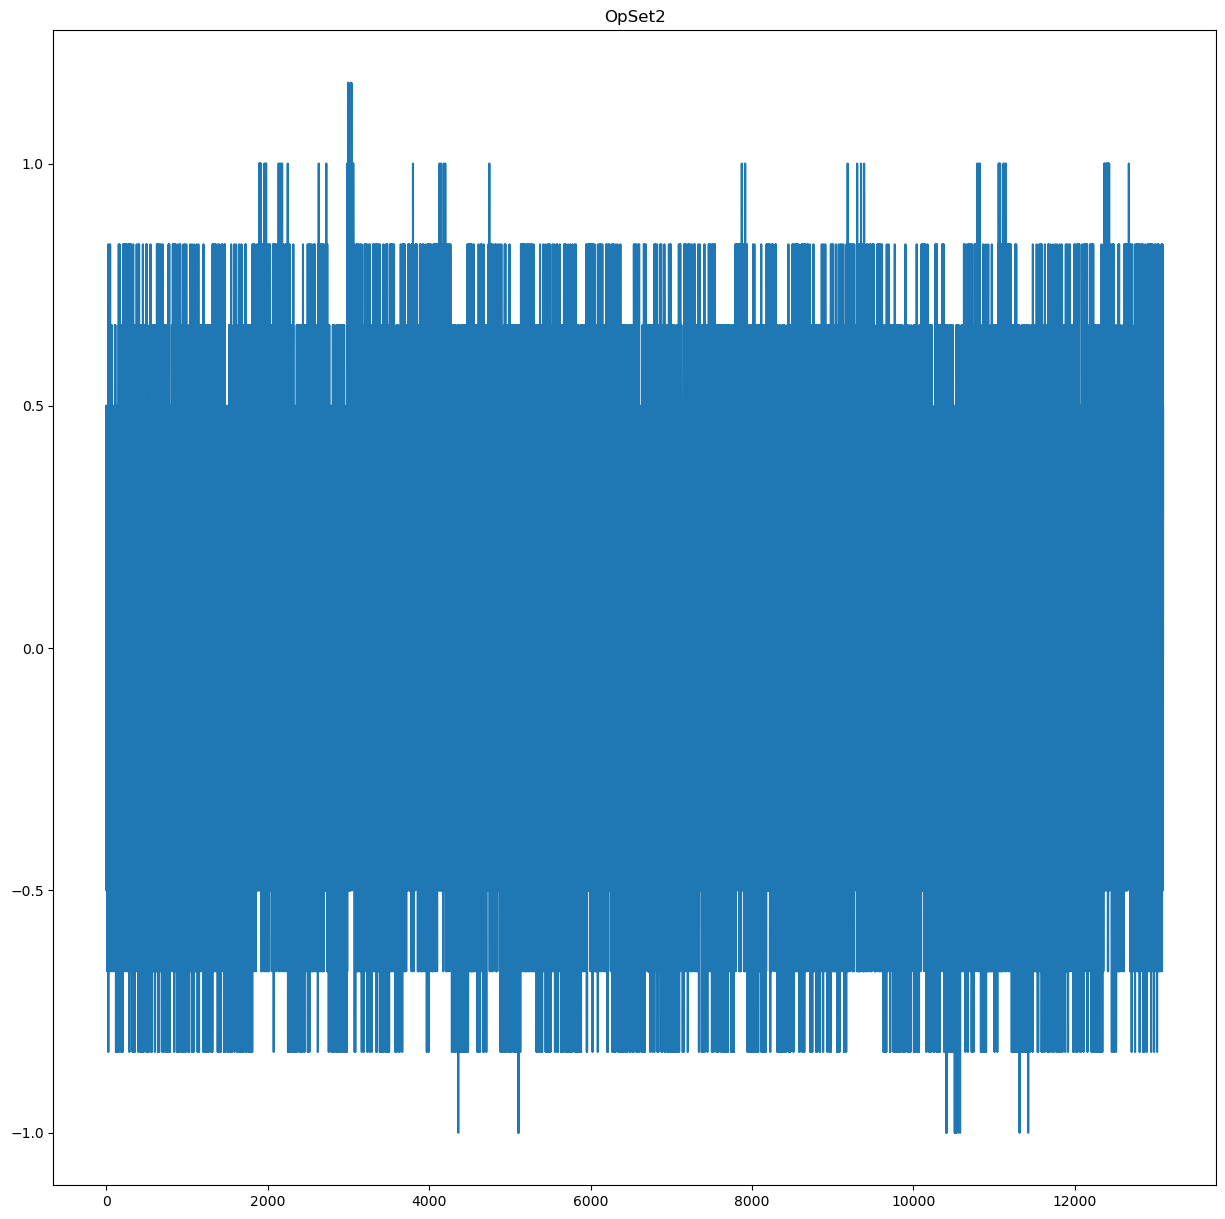

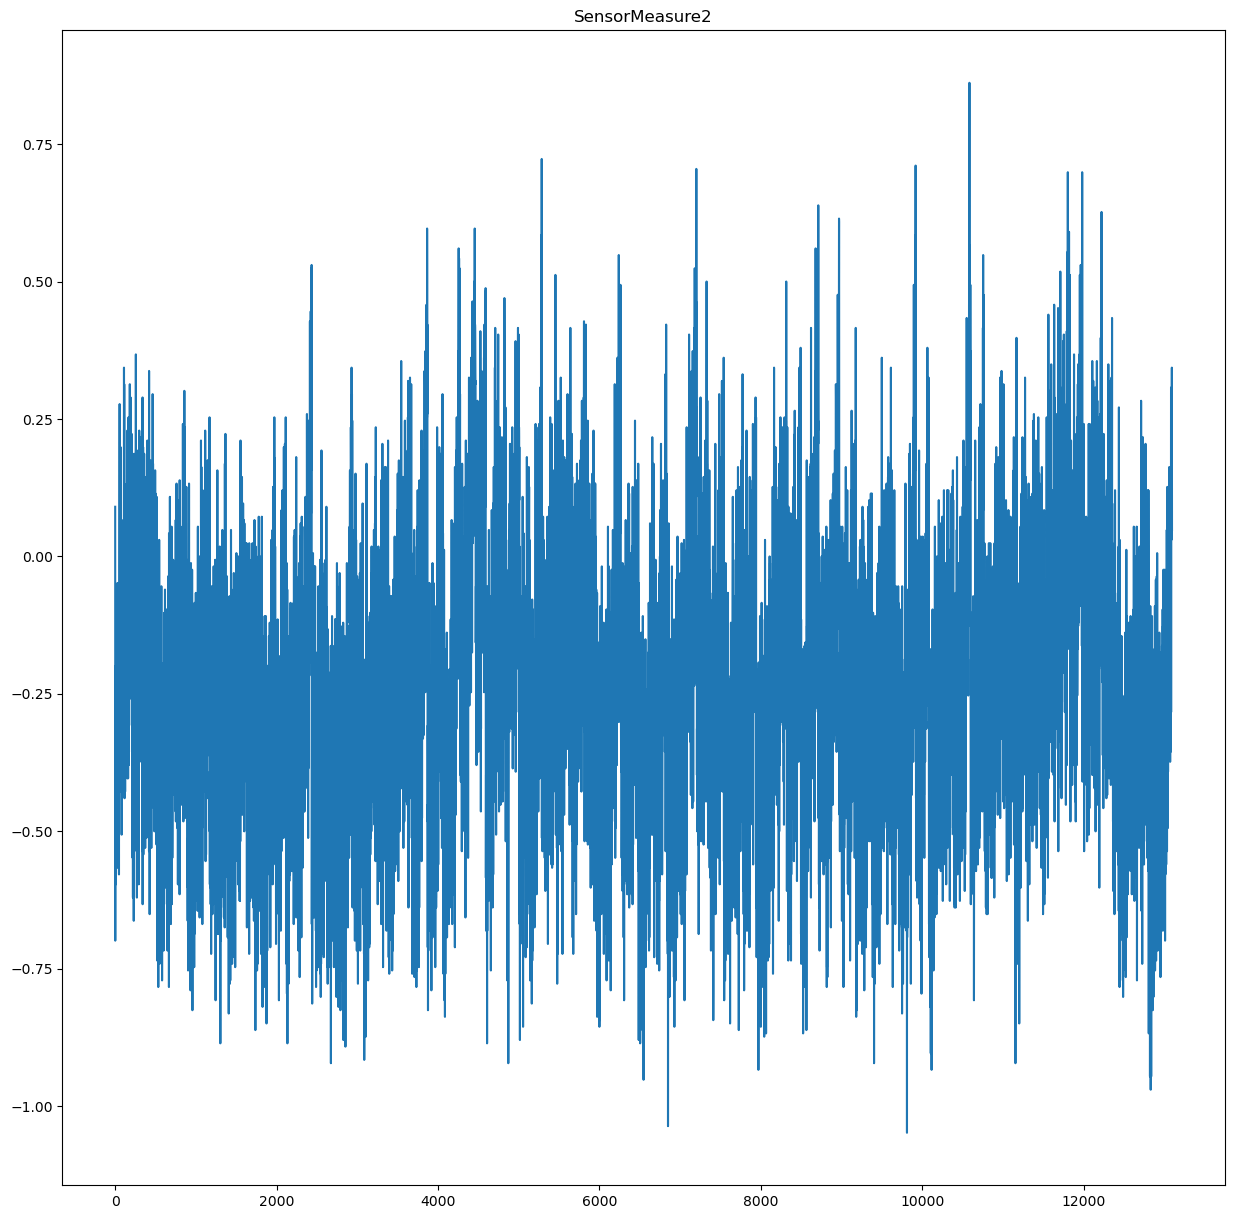

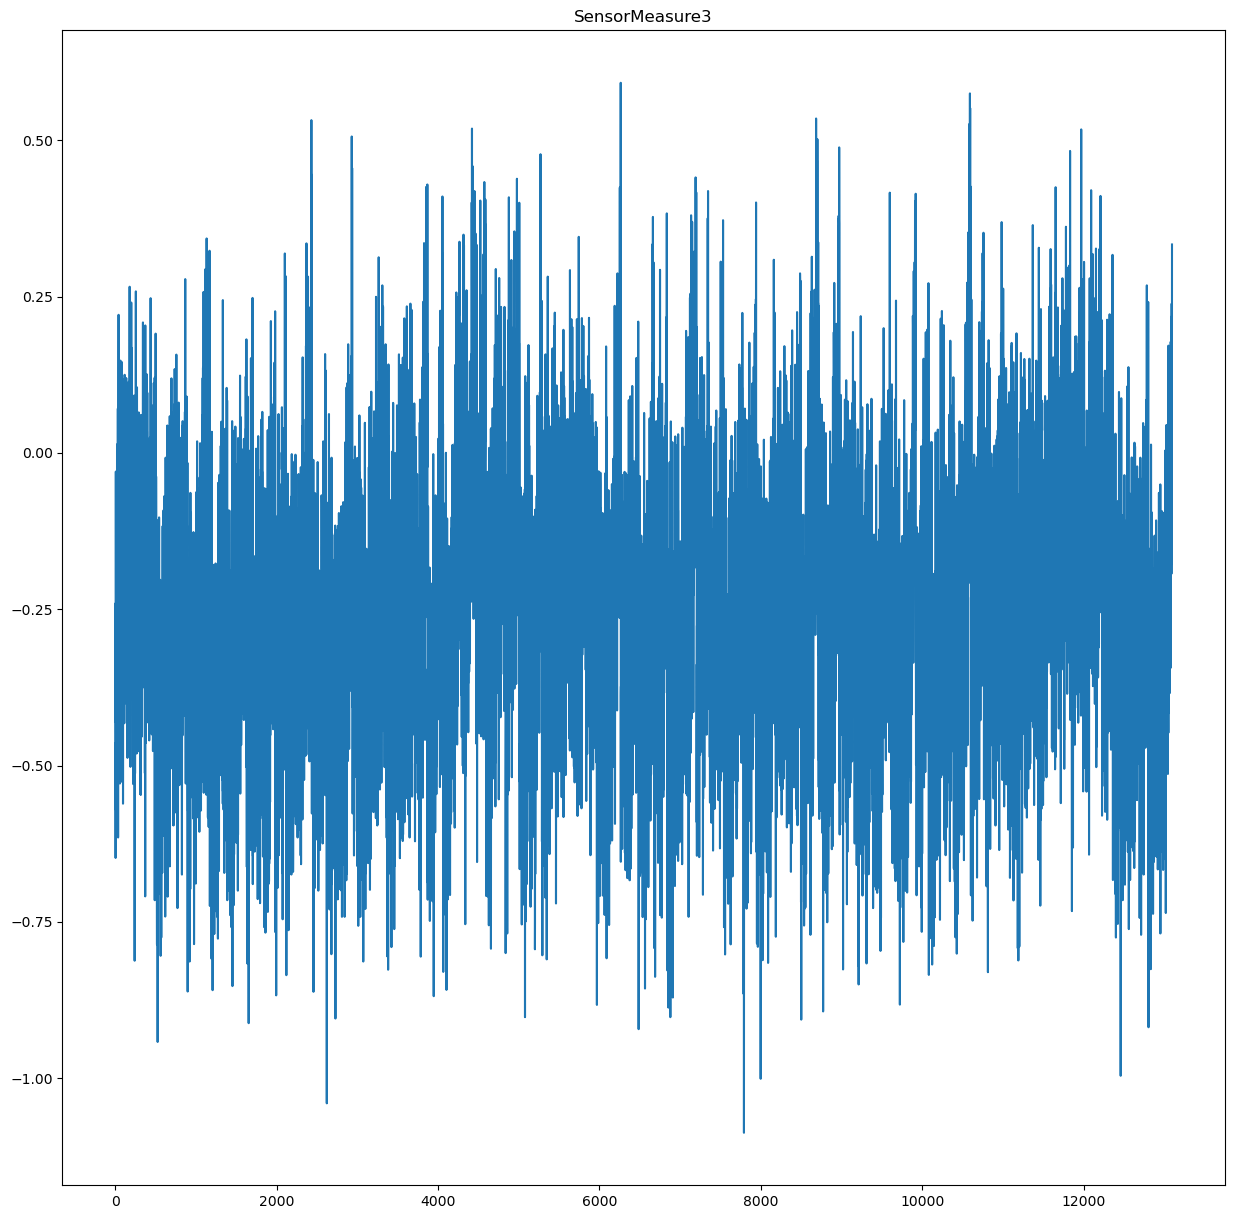

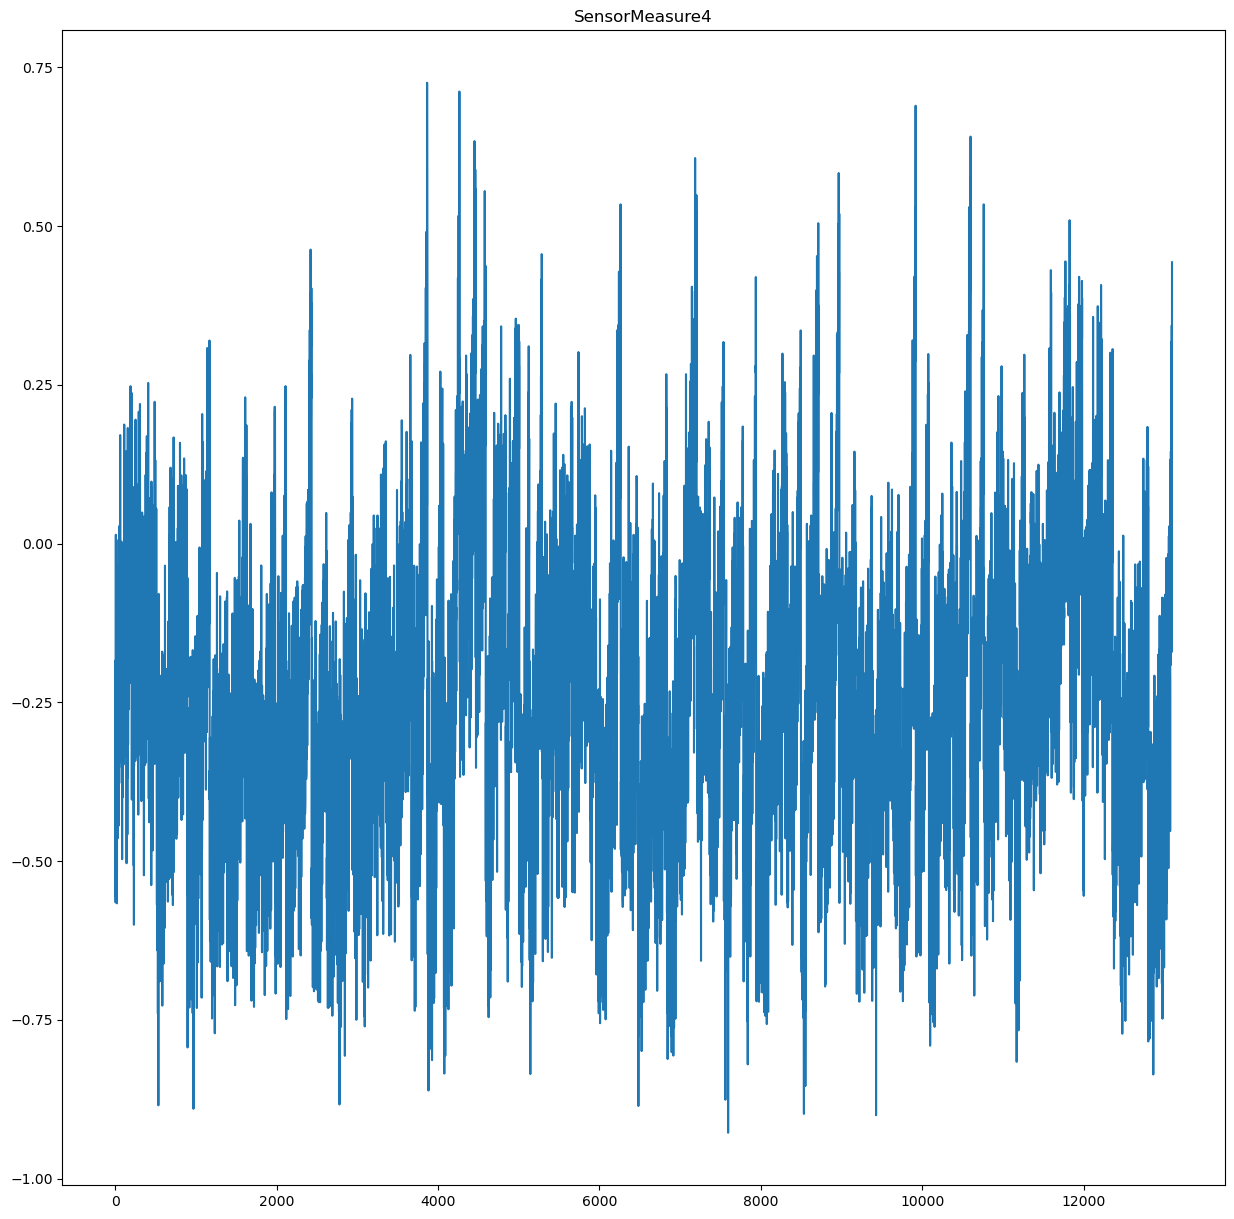

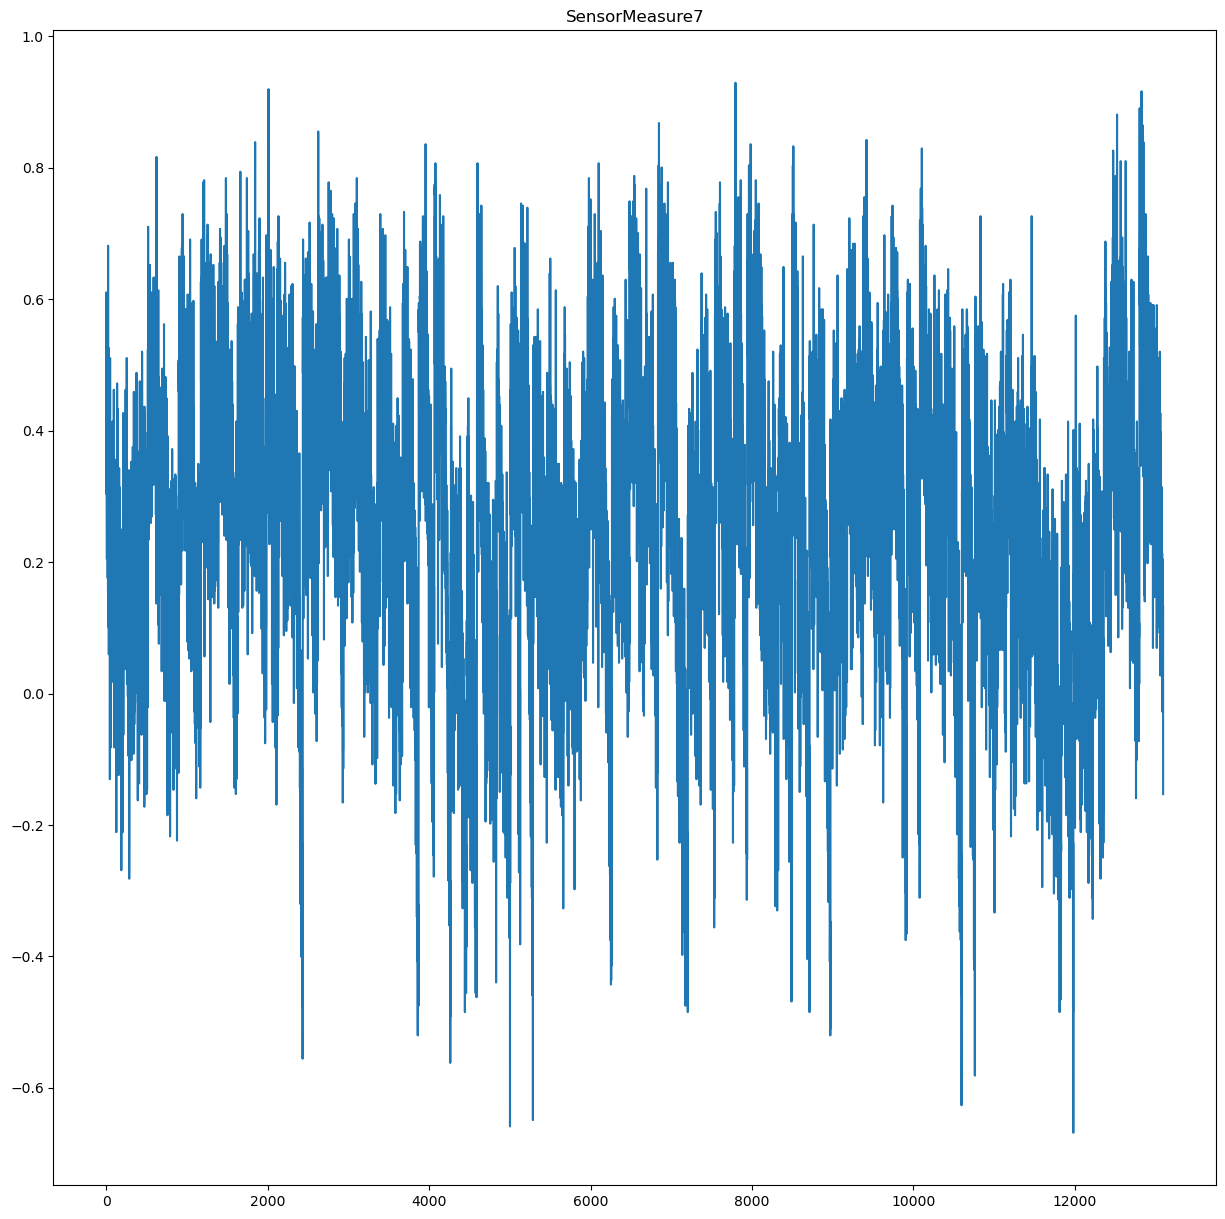

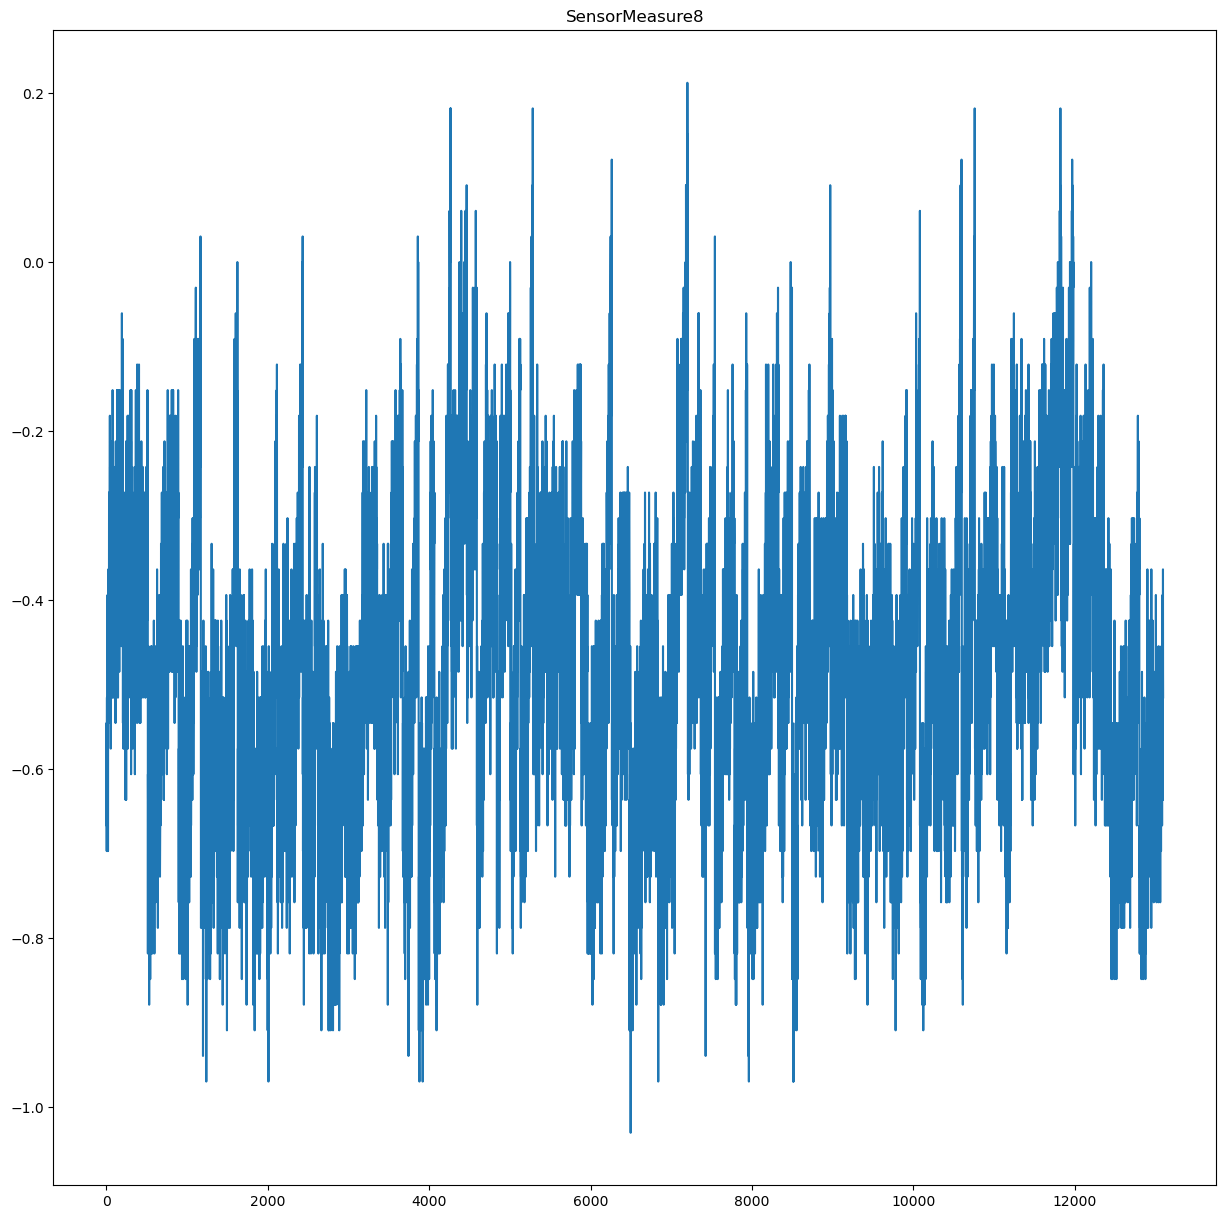

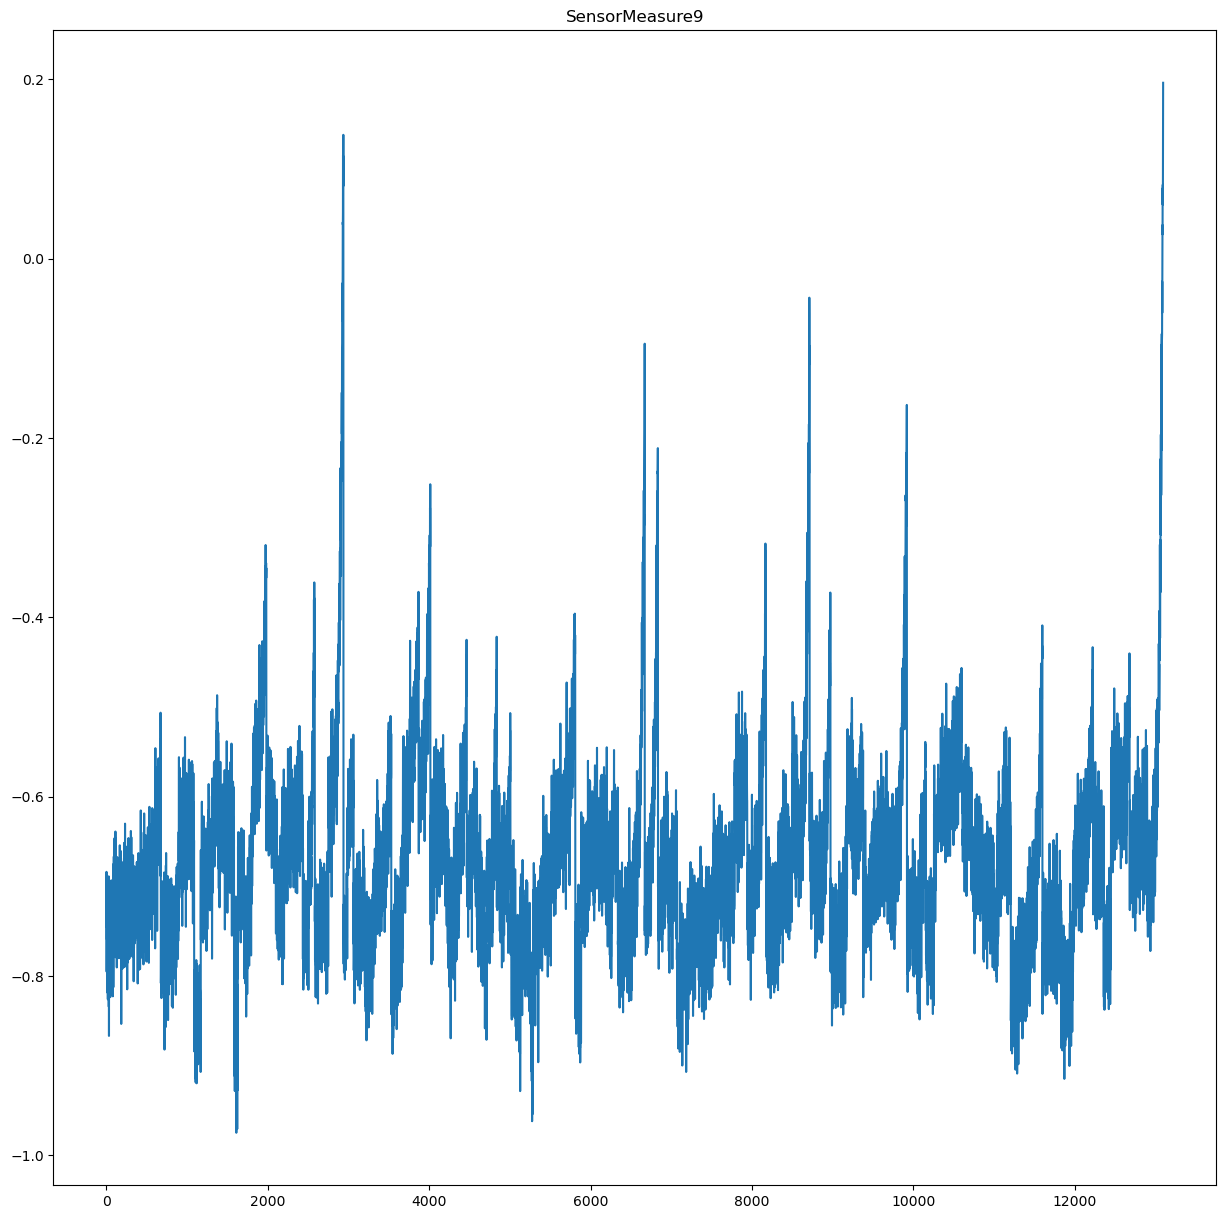

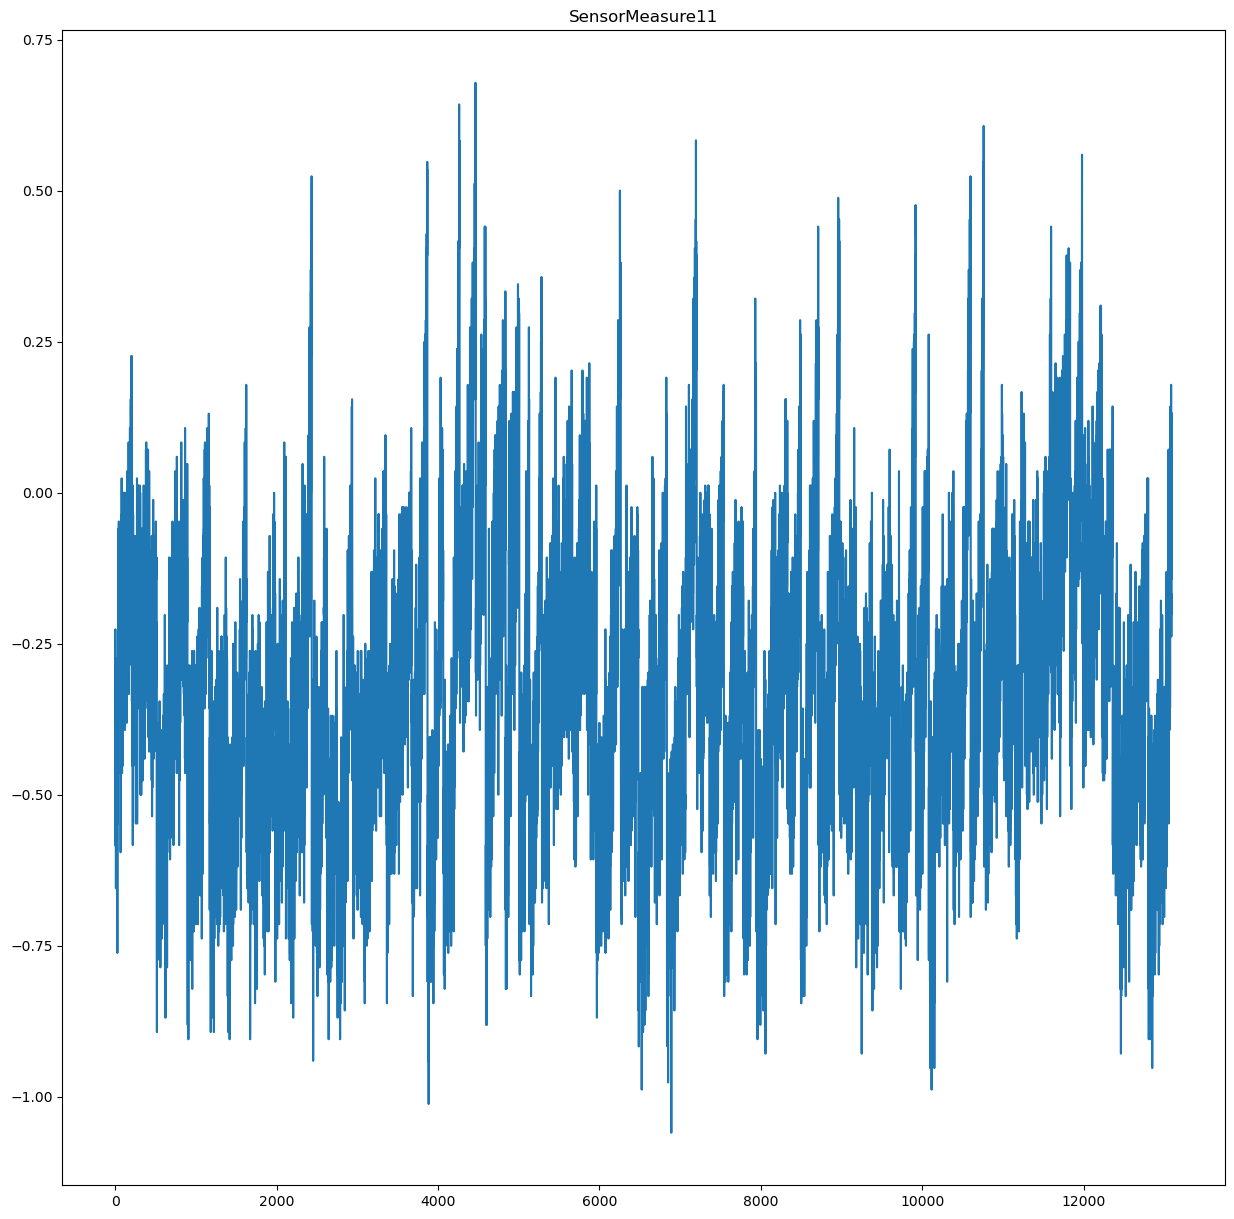

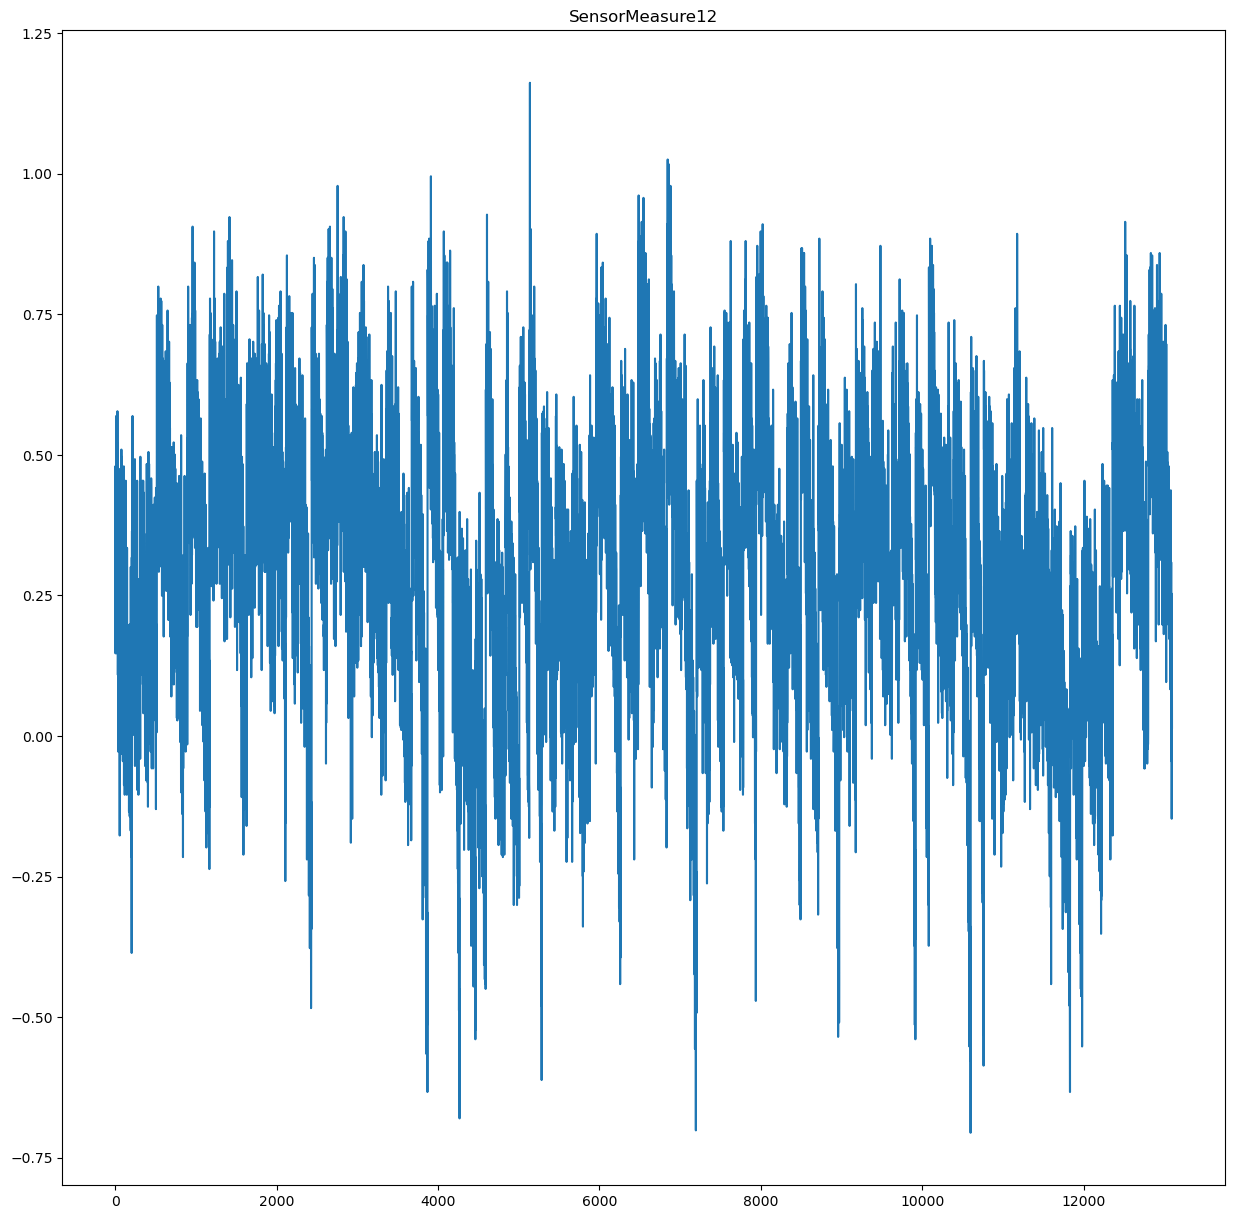

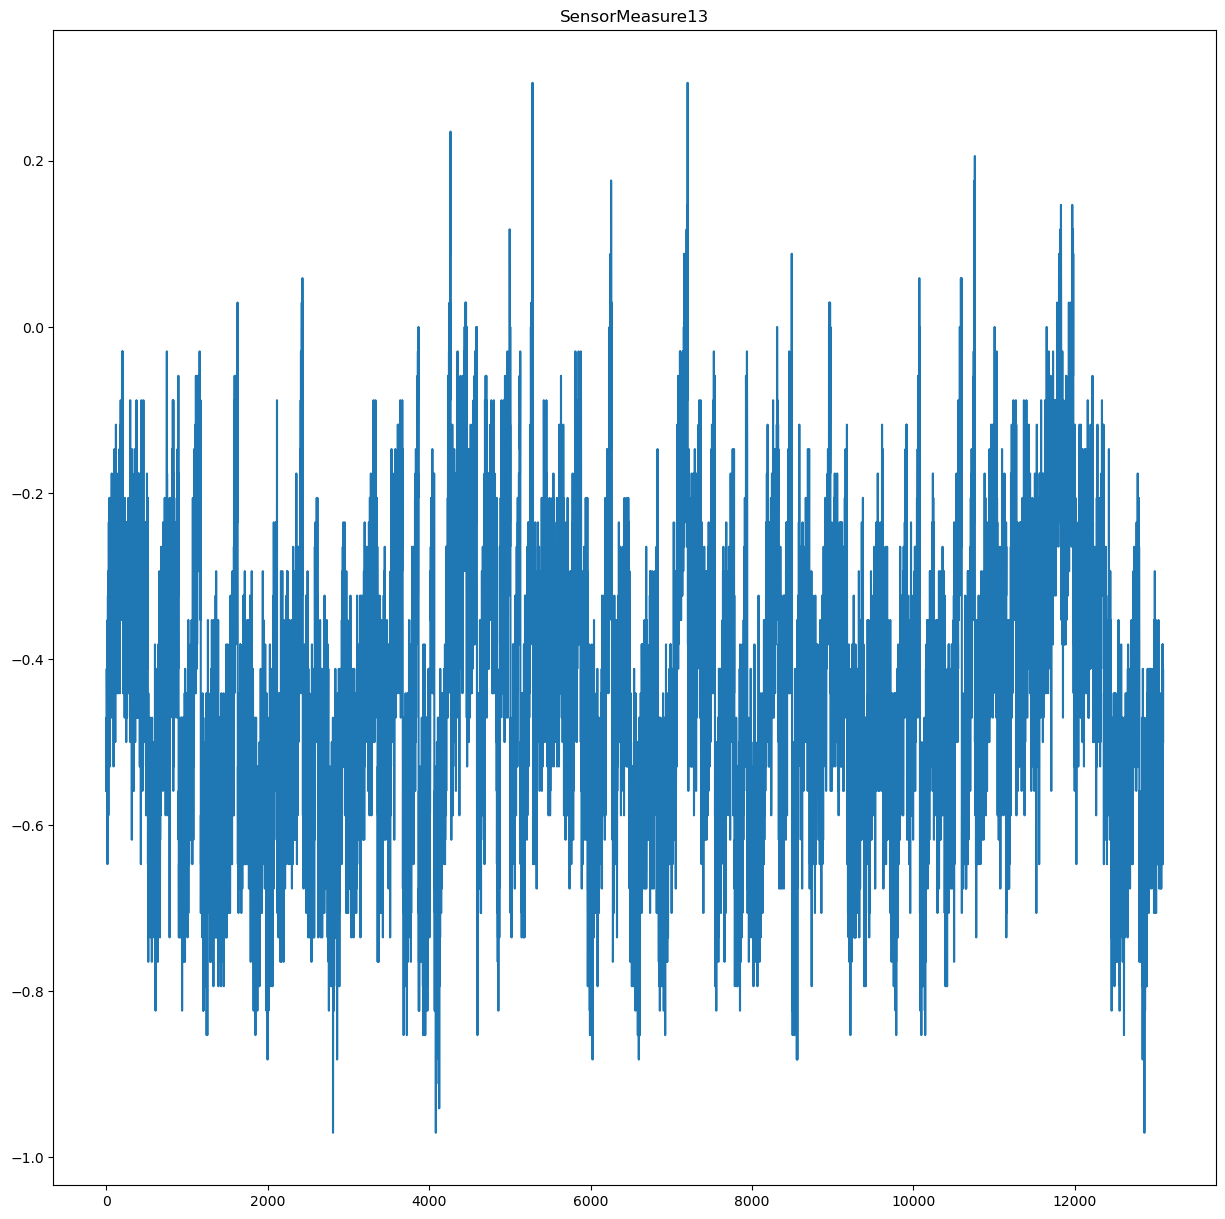

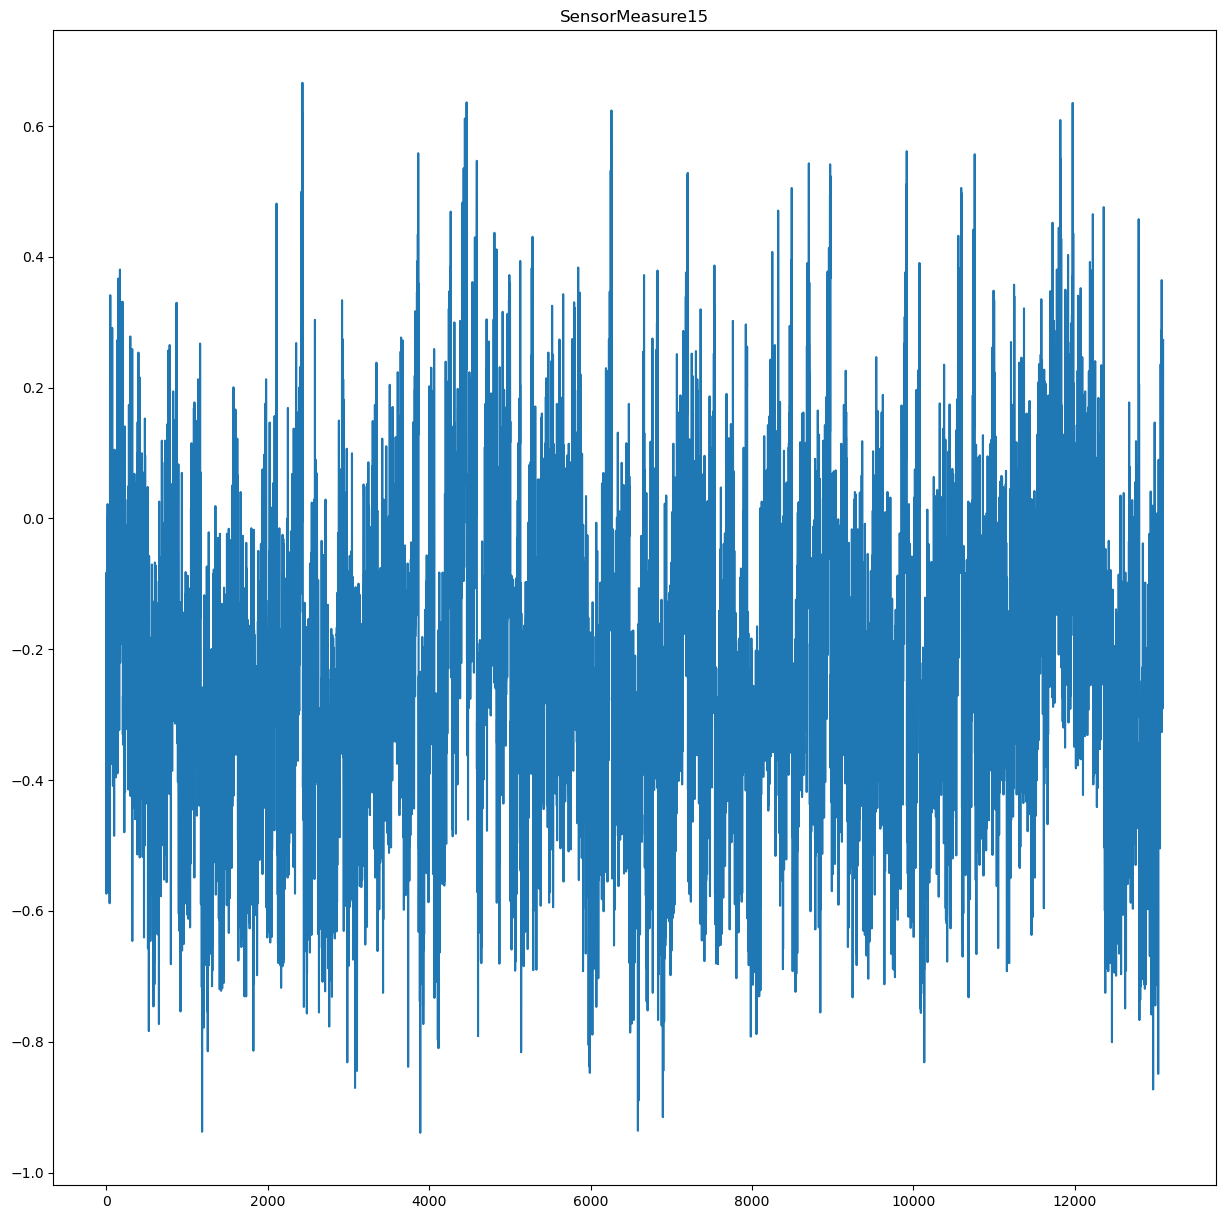

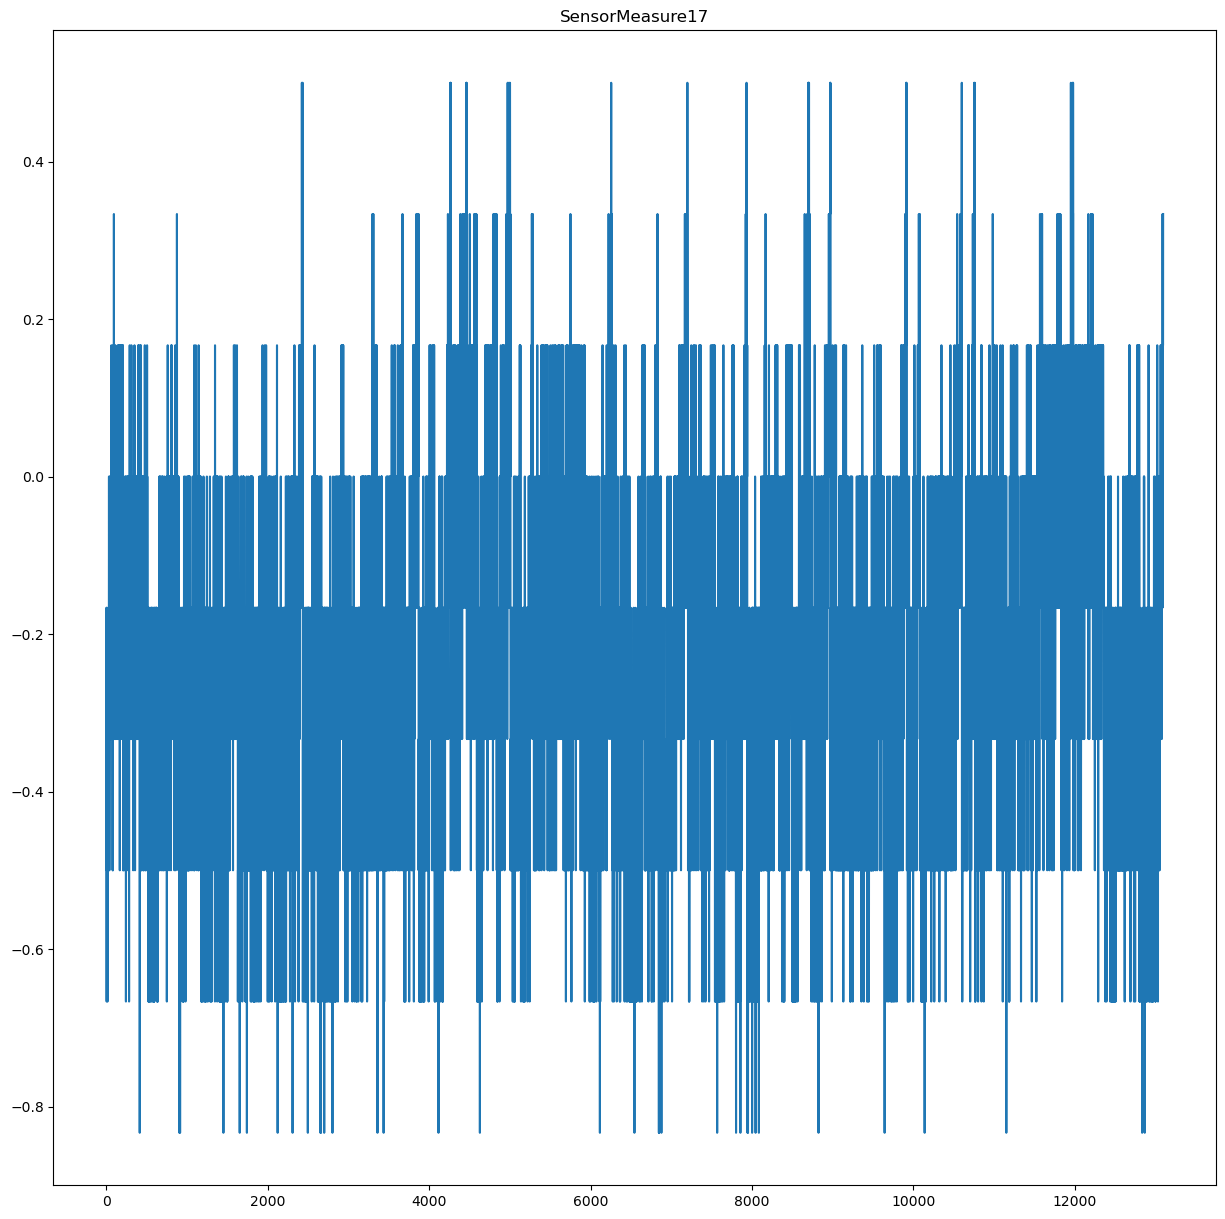

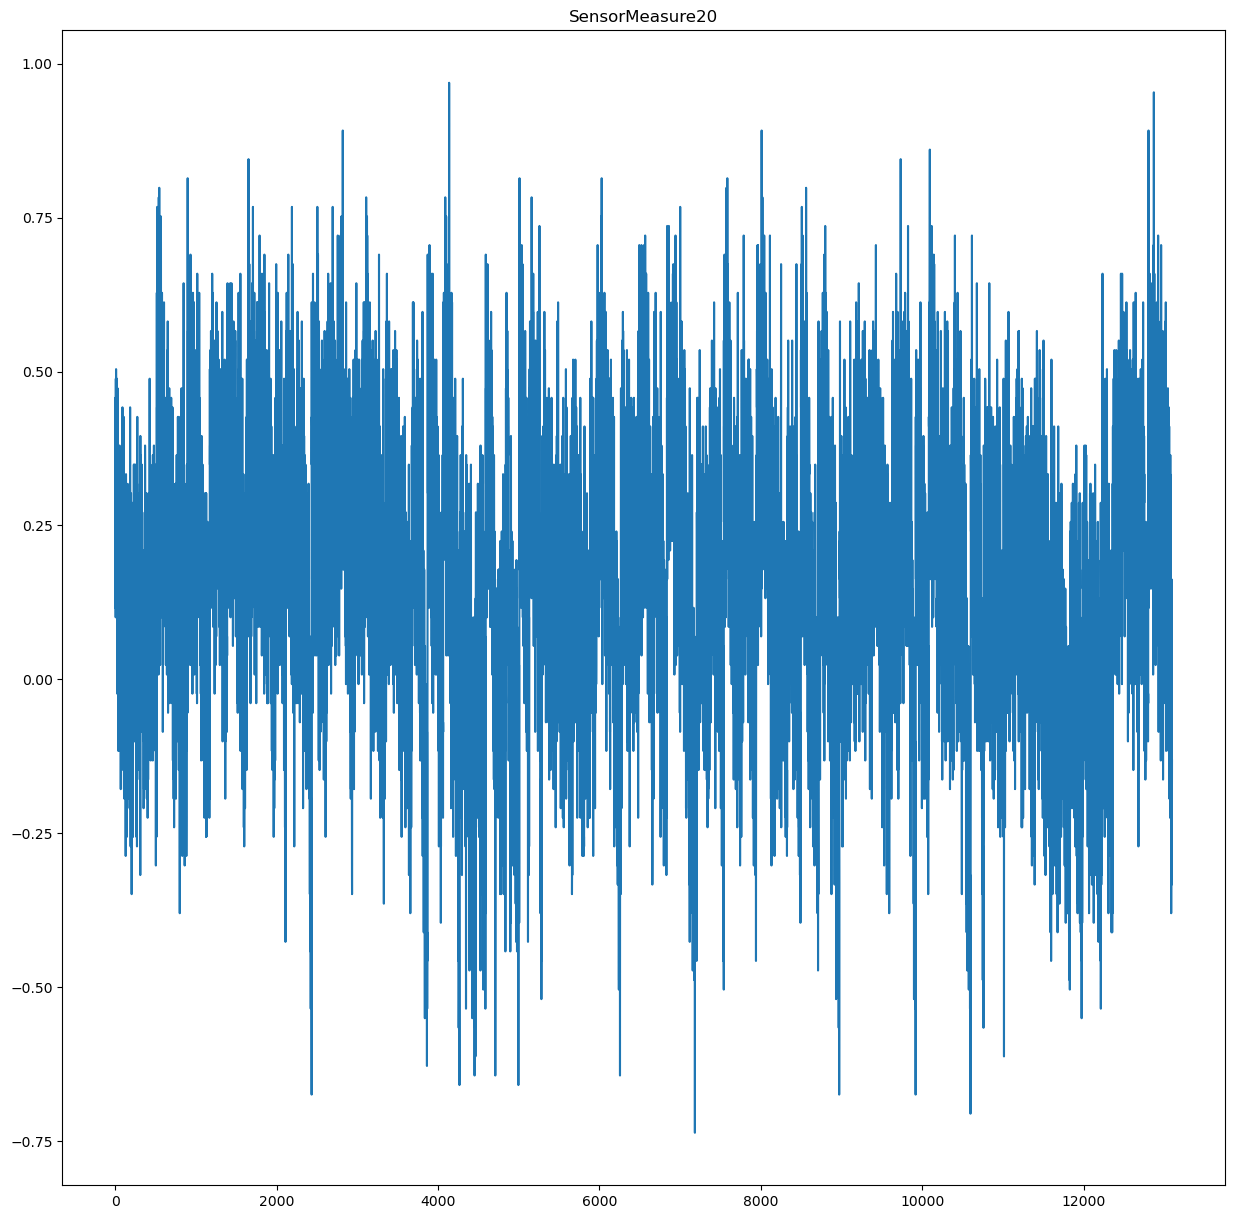

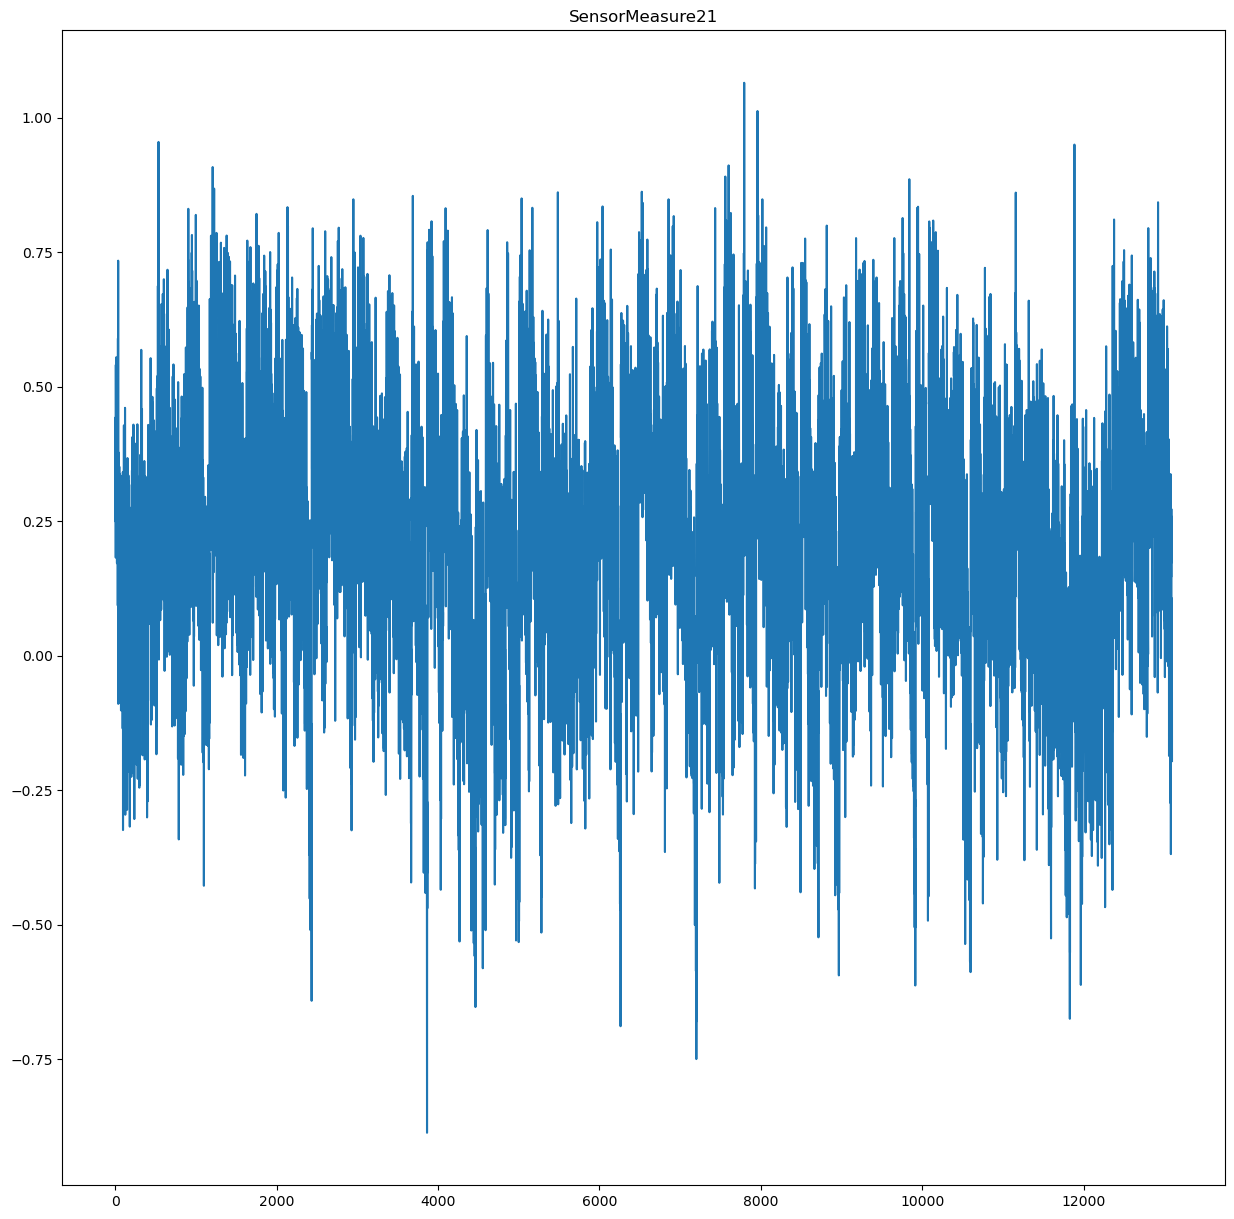

In [17]:
for i in df_test:
    mlp.figure(figsize=(15,15))
    df_test[i].plot()
    mlp.title(i)
    

(array([ 992., 2051., 2104., 2049., 2029., 4167., 2038., 2065., 1997.,
        1139.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

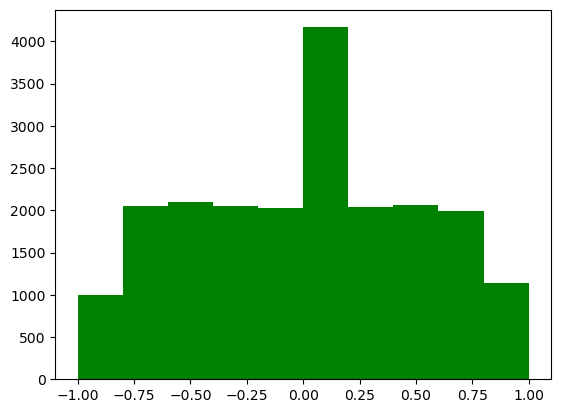

In [18]:
mlp.hist(df_train['OpSet2'],color='green')

(array([  31.,  452., 2022., 4578., 5445., 6402., 1185.,  436.,   72.,
           8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

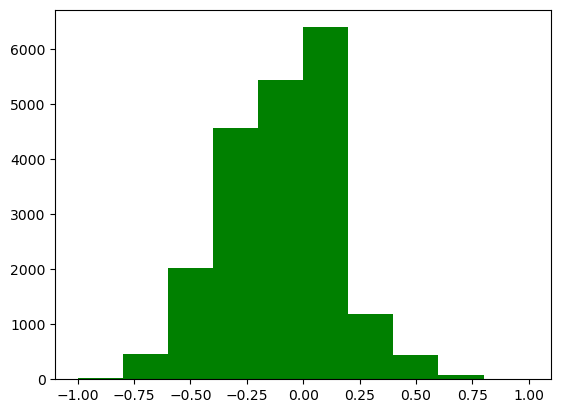

In [19]:
mlp.hist(df_train['SensorMeasure17'],color='green')

(array([ 638., 1245., 1354., 2632., 1272., 1320., 2601., 1290.,  681.,
          63.]),
 array([-1.        , -0.78333333, -0.56666667, -0.35      , -0.13333333,
         0.08333333,  0.3       ,  0.51666667,  0.73333333,  0.95      ,
         1.16666667]),
 <BarContainer object of 10 artists>)

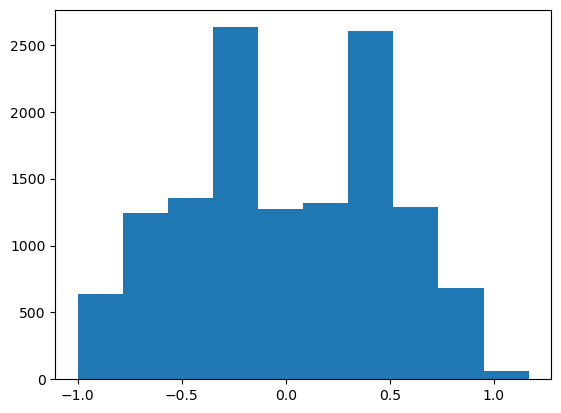

In [20]:
mlp.hist(df_test['OpSet2'])

(array([  36.,  412., 2003., 3962.,    0., 3911., 1981.,  642.,  123.,
          26.]),
 array([-0.83333333, -0.7       , -0.56666667, -0.43333333, -0.3       ,
        -0.16666667, -0.03333333,  0.1       ,  0.23333333,  0.36666667,
         0.5       ]),
 <BarContainer object of 10 artists>)

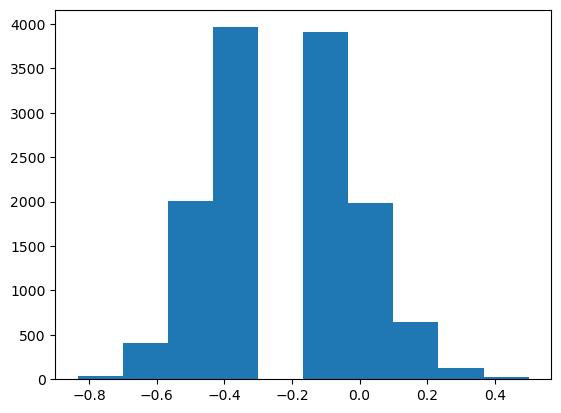

In [21]:
mlp.hist(df_test['SensorMeasure17'])

In [22]:
df_train.isnull().sum()

UnitNumber         0
Cycle              0
OpSet1             0
OpSet2             0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure9     0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure15    0
SensorMeasure17    0
SensorMeasure20    0
SensorMeasure21    0
RUL                0
failure            0
dtype: int64

In [23]:
df_test.isnull().sum()

UnitNumber         0
Cycle              0
OpSet1             0
OpSet2             0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure9     0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure15    0
SensorMeasure17    0
SensorMeasure20    0
SensorMeasure21    0
dtype: int64

In [24]:
df_train.describe()

UnitNumber         Cycle        OpSet1        OpSet2  SensorMeasure2  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.000000   
mean      51.506568    108.807862     -0.001020      0.003918       -0.113895   
std       29.227633     68.880990      0.251415      0.488437        0.301237   
min        1.000000      1.000000     -1.000000     -1.000000       -1.000000   
25%       26.000000     52.000000     -0.172414     -0.333333       -0.328313   
50%       52.000000    104.000000      0.000000      0.000000       -0.138554   
75%       77.000000    156.000000      0.172414      0.500000        0.078313   
max      100.000000    362.000000      1.000000      1.000000        1.000000   

       SensorMeasure3  SensorMeasure4  SensorMeasure7  SensorMeasure8  \
count    20631.000000    20631.000000    20631.000000    20631.000000   
mean        -0.150507       -0.099130        0.132918       -0.404086   
std          0.267327        0.303869        0.285054        0.215108   
min         -1.000000       -1.000000       -1.000000       -1.000000   
25%         -0.336385       -0.321067       -0.046699       -0.545455   
50%         -0.168956       -0.129305        0.156200       -0.424242   
75%          0.017659        0.090648        0.339775       -0.272727   
max          1.000000        1.000000        1.000000        1.000000   

       SensorMeasure9  SensorMeasure11  SensorMeasure12  SensorMeasure13  \
count    20631.000000     20631.000000     20631.000000     20631.000000   
mean        -0.609504        -0.177181         0.161394        -0.364258   
std          0.198177         0.317961         0.314522         0.211526   
min         -1.000000        -1.000000        -1.000000        -1.000000   
25%         -0.718478        -0.404762        -0.031983        -0.529412   
50%         -0.650633        -0.214286         0.189765        -0.382353   
75%         -0.572018         0.011905         0.390192        -0.235294   
max          1.000000         1.000000         1.000000         1.000000   

       SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21  \
count     20631.000000     20631.000000     20631.000000     20631.000000   
mean         -0.097764        -0.131558         0.048482         0.092255   
std           0.288611         0.258127         0.280227         0.298953   
min          -1.000000        -1.000000        -1.000000        -1.000000   
25%          -0.307426        -0.333333        -0.131783        -0.095278   
50%          -0.122740        -0.166667         0.069767         0.114885   
75%           0.082724         0.000000         0.255814         0.305164   
max           1.000000         1.000000         1.000000         1.000000   

                RUL       failure  
count  20631.000000  20631.000000  
mean     107.807862      0.242354  
std       68.880990      0.428518  
min        0.000000      0.000000  
25%       51.000000      0.000000  
50%      103.000000      0.000000  
75%      155.000000      0.000000  
max      361.000000      1.000000

In [25]:
df_test.describe()

UnitNumber         Cycle        OpSet1        OpSet2  SensorMeasure2  \
count  13096.000000  13096.000000  13096.000000  13096.000000    13096.000000   
mean      51.543907     76.836515     -0.001285      0.007063       -0.237899   
std       28.289423     53.057749      0.253182      0.490051        0.241506   
min        1.000000      1.000000     -0.942529     -1.000000       -1.048193   
25%       28.000000     33.000000     -0.172414     -0.333333       -0.405120   
50%       52.000000     69.000000      0.000000      0.000000       -0.246988   
75%       76.000000    113.000000      0.172414      0.500000       -0.078313   
max      100.000000    303.000000      0.896552      1.166667        0.861446   

       SensorMeasure3  SensorMeasure4  SensorMeasure7  SensorMeasure8  \
count    13096.000000    13096.000000    13096.000000    13096.000000   
mean        -0.256193       -0.240872        0.258461       -0.481926   
std          0.218150        0.225804        0.219416        0.174066   
min         -1.087203       -0.927752       -0.668277       -1.030303   
25%         -0.408764       -0.402431        0.114332       -0.606061   
50%         -0.260955       -0.250844        0.272142       -0.484848   
75%         -0.113909       -0.095206        0.413849       -0.363636   
max          0.591890        0.725523        0.929147        0.212121   

       SensorMeasure9  SensorMeasure11  SensorMeasure12  SensorMeasure13  \
count    13096.000000     13096.000000     13096.000000     13096.000000   
mean        -0.670848        -0.325947         0.303933        -0.438163   
std          0.102632         0.233235         0.238647         0.167454   
min         -0.974872        -1.059524        -0.705757        -0.970588   
25%         -0.737144        -0.500000         0.147122        -0.558824   
50%         -0.680607        -0.333333         0.317697        -0.441176   
75%         -0.619672        -0.178571         0.475480        -0.323529   
max          0.196267         0.678571         1.162047         0.294118   

       SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21  
count     13096.000000     13096.000000     13096.000000     13096.000000  
mean         -0.223209        -0.238063         0.166669         0.219394  
std           0.223235         0.205596         0.219660         0.232312  
min          -0.939207        -0.833333        -0.736434        -0.886219  
25%          -0.378992        -0.333333         0.023256         0.069870  
50%          -0.230473        -0.166667         0.178295         0.228942  
75%          -0.081185        -0.166667         0.317829         0.379177  
max           0.666025         0.500000         0.968992         1.064899

In [26]:
df_train.shape

(20631, 19)

In [27]:
df_test.shape

(13096, 17)

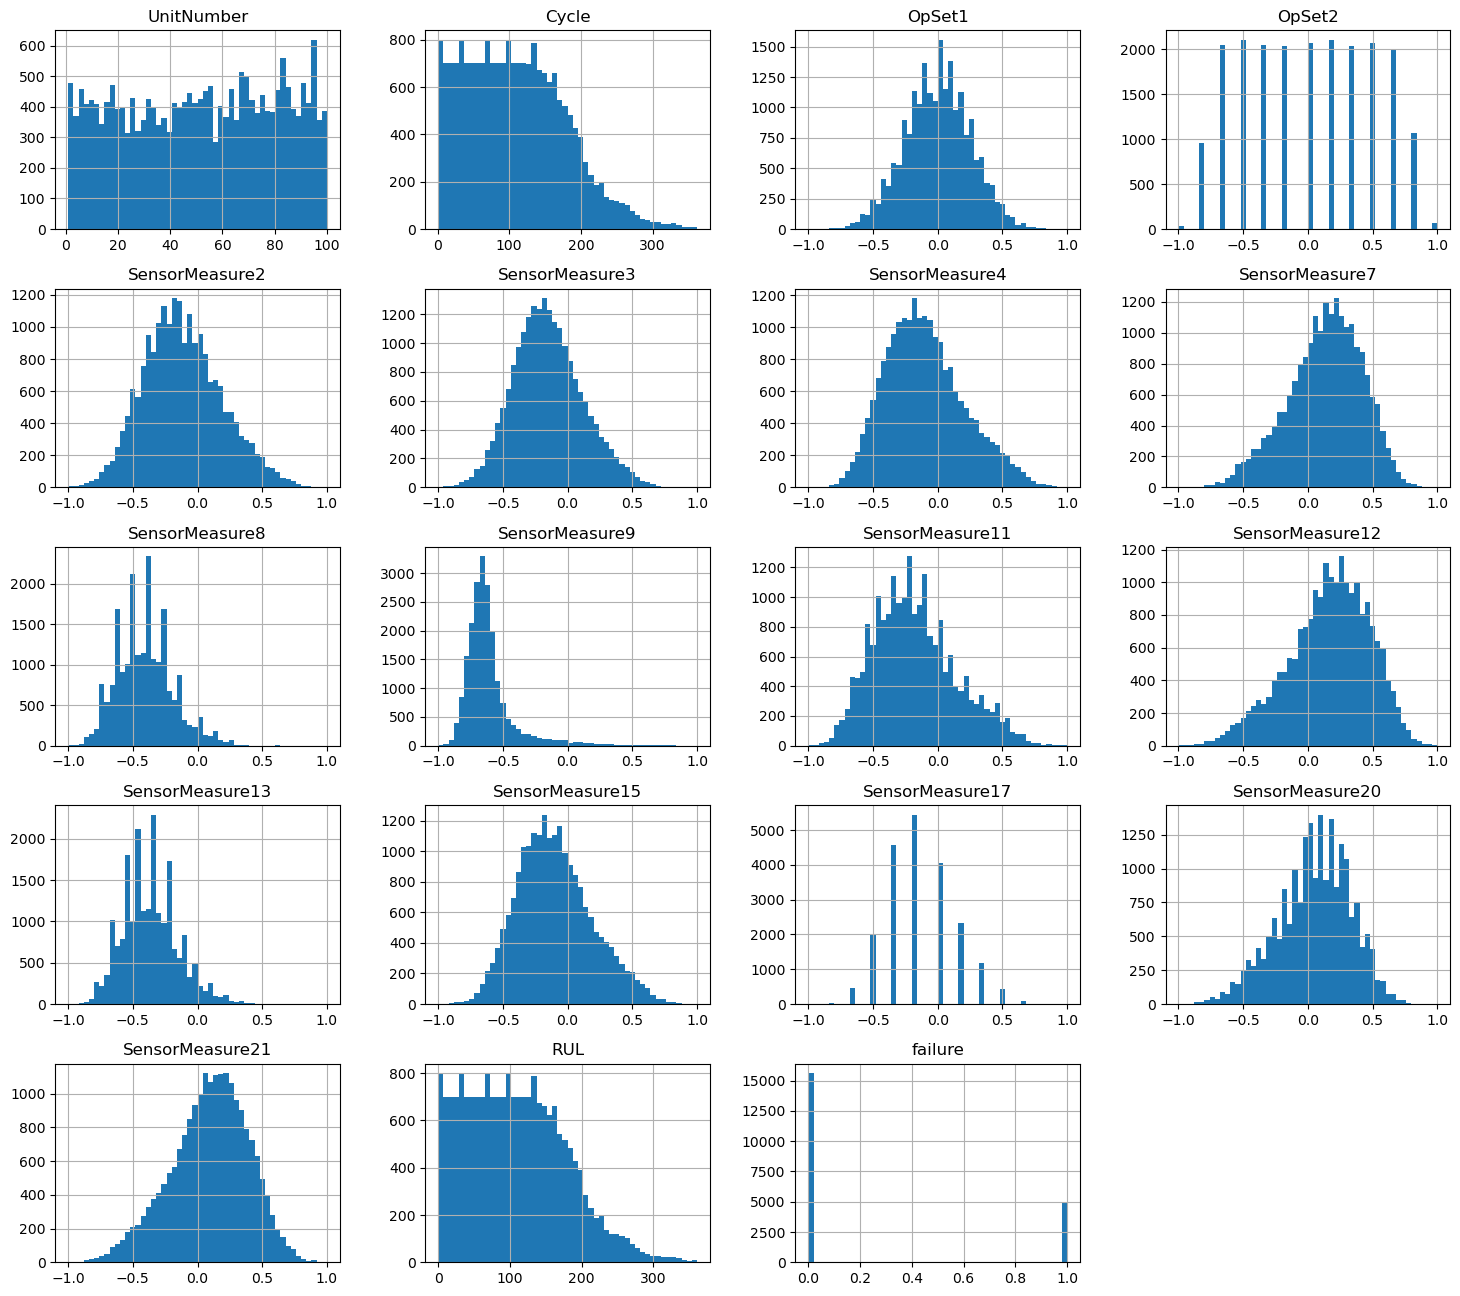

In [28]:
df_train.hist(bins=50, figsize=(18,16))
mlp.show()

In [29]:
x_train=df_train.drop(['RUL','failure'],axis=1)
y_train=df_train['RUL']

In [30]:
x_train.head()

UnitNumber  Cycle    OpSet1    OpSet2  SensorMeasure2  SensorMeasure3  \
0           1      1 -0.080460 -0.666667       -0.632530       -0.186396   
1           1      2  0.218391 -0.500000       -0.433735       -0.093961   
2           1      3 -0.494253  0.500000       -0.313253       -0.260955   
3           1      4  0.080460  0.000000       -0.313253       -0.487683   
4           1      5 -0.218391 -0.333333       -0.301205       -0.485066   

   SensorMeasure4  SensorMeasure7  SensorMeasure8  SensorMeasure9  \
0       -0.380486        0.452496       -0.515152       -0.780490   
1       -0.294733        0.256039       -0.575758       -0.799515   
2       -0.258947        0.420290       -0.454545       -0.719914   
3       -0.337610        0.481481       -0.363636       -0.750965   
4       -0.190749        0.336554       -0.515152       -0.700081   

   SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure15  \
0        -0.261905         0.266525        -0.588235        -0.272028   
1        -0.238095         0.530917        -0.441176        -0.177376   
2        -0.500000         0.590618        -0.558824        -0.285110   
3        -0.666667         0.778252        -0.411765        -0.666795   
4        -0.488095         0.492537        -0.529412        -0.195845   

   SensorMeasure17  SensorMeasure20  SensorMeasure21  
0        -0.333333         0.426357         0.449323  
1        -0.333333         0.333333         0.462027  
2        -0.666667         0.255814         0.242751  
3        -0.333333         0.147287         0.324772  
4        -0.166667         0.178295         0.409003

In [31]:
print(x_train.shape)
print(y_train.shape)
print(df_test.shape)
print(df_train.shape)

(20631, 17)
(20631,)
(13096, 17)
(20631, 19)


In [32]:
y_train

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20,random_state=20)

In [35]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [36]:
model = Sequential()
model.add(Dense(6, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
258/258 [==============================] - 17s 5ms/step - loss: 13294.1543
Epoch 2/100
258/258 [==============================] - 1s 4ms/step - loss: 8673.2998
Epoch 3/100
258/258 [==============================] - 1s 4ms/step - loss: 6919.6841
Epoch 4/100
258/258 [==============================] - 1s 4ms/step - loss: 5862.2417
Epoch 5/100
258/258 [==============================] - 2s 6ms/step - loss: 5275.4985
Epoch 6/100
258/258 [==============================] - 1s 3ms/step - loss: 4822.3330
Epoch 7/100
258/258 [==============================] - 1s 3ms/step - loss: 4539.1670
Epoch 8/100
258/258 [==============================] - 1s 3ms/step - loss: 4294.3105
Epoch 9/100
258/258 [==============================] - 1s 4ms/step - loss: 4021.8411
Epoch 10/100
258/258 [==============================] - 1s 4ms/step - loss: 3700.4954
Epoch 11/100
258/258 [==============================] - 1s 4ms/step - loss: 3323.3167
Epoch 12/100
258/258 [==============================] - 1s 4m

258/258 [==============================] - 1s 4ms/step - loss: 1297.3478
Epoch 97/100
258/258 [==============================] - 1s 3ms/step - loss: 1297.5433
Epoch 98/100
258/258 [==============================] - 1s 4ms/step - loss: 1295.8708
Epoch 99/100
258/258 [==============================] - 1s 4ms/step - loss: 1297.3140
Epoch 100/100
258/258 [==============================] - 1s 4ms/step - loss: 1294.9564


In [37]:
pridect=model.predict(x_test)

129/129 [==============================] - 3s 6ms/step


In [38]:
test = pd.merge(x_test,x_test.groupby('UnitNumber', as_index=False)['Cycle'].max(), how='left', on='UnitNumber')
test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
test['score'] = pridect

In [39]:
print(pridect.min(), pridect.max())

4.639683 238.54758


In [40]:
test.head()

UnitNumber  Cycle_x    OpSet1    OpSet2  SensorMeasure2  SensorMeasure3  \
0          36       73  0.264368  0.333333        0.180723       -0.189884   
1          73       51  0.011494  0.666667       -0.054217       -0.243078   
2           1       80 -0.022989 -0.666667       -0.560241       -0.087857   
3          59       62  0.425287 -0.333333       -0.578313       -0.555701   
4          50      154  0.264368 -0.166667        0.132530        0.147155   

   SensorMeasure4  SensorMeasure7  SensorMeasure8  SensorMeasure9  \
0       -0.319716        0.004831       -0.424242       -0.701068   
1        0.017893        0.214171       -0.303030       -0.745131   
2       -0.617488        0.307568       -0.515152       -0.803105   
3       -0.590817        0.471820       -0.636364       -0.663735   
4        0.170493        0.194847       -0.454545       -0.379521   

   SensorMeasure11  SensorMeasure12  SensorMeasure13  SensorMeasure15  \
0        -0.250000         0.117271        -0.323529        -0.079646   
1        -0.119048        -0.010661        -0.294118         0.014236   
2        -0.059524         0.206823        -0.352941        -0.241247   
3        -0.559524         0.611940        -0.647059        -0.530589   
4        -0.011905        -0.215352        -0.235294         0.024240   

   SensorMeasure17  SensorMeasure20  SensorMeasure21  Cycle_y       score  
0        -0.333333        -0.085271         0.159901      158  114.760773  
1        -0.166667        -0.054264         0.292737      204  140.960968  
2        -0.333333         0.162791         0.289975      192  117.721405  
3        -0.333333         0.488372         0.301022      226  165.542236  
4         0.000000        -0.085271        -0.154653      191   40.825661

In [41]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
pride=random.predict(x_test)

In [43]:
print("mean squered error",mean_squared_error(y_test,pride))

mean squered error 263.0769447540586


In [44]:
from sklearn.metrics import mean_absolute_error
print("mean absulute error",mean_absolute_error(y_test,pride))

mean absulute error 10.874867942815605


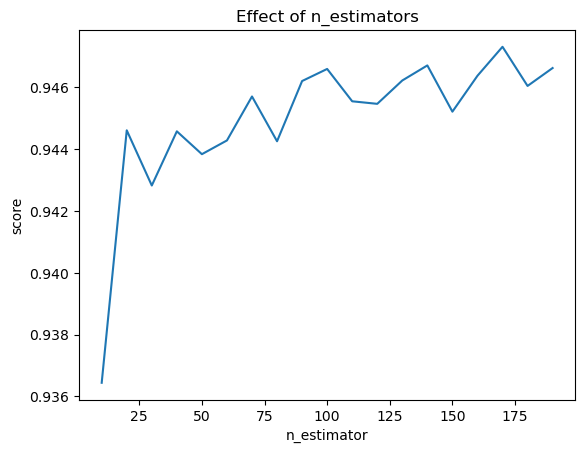

In [45]:
from subprocess import check_output
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    random.set_params(n_estimators=n)
    random.fit(x_train, y_train)
    scores.append(random.score(x_test, y_test))
mlp.title("Effect of n_estimators")
mlp.xlabel("n_estimator")
mlp.ylabel("score")
mlp.plot(estimators, scores)

In [46]:
import joblib
# save
joblib.dump(random, "./random_forest.joblib")

['./random_forest.joblib']

In [47]:
import pickle
predictive_mantainance="predictive.pkl"
with open(predictive_mantainance, 'wb') as file:  
    pickle.dump(random, file)

In [48]:
with open(predictive_mantainance, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

RandomForestRegressor(n_estimators=190)

In [49]:
# Calculate the Score 
score = Pickled_LR_Model.score(x_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score)) 

Test score: 94.66 %
